# Quantile regression of heteroskedastic functional data

## Generating simulated functional data

In [1]:
cp <- 1
Meth <- "Wrep"
tau0 <- 0.5
case <- "case1a"

In [2]:
switch (case, 
          
          #case 1 - asymptotic verification
          "case1a" = {caseN ="case1a"; n = 200; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.; rho.u = 0.; rho.m = 0; Delta=1; t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]},# normal Error / beta(t) = met[1]
          "case2a" = {caseN ="case2a"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0; rho.u = 0; rho.m = 0; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case3a" = {caseN ="case3a"; n = 1000; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0; rho.u = 0; rho.m = 0; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          #"case4a" = {caseN ="case4a"; n = 1000; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0; rho.u = 0; rho.m = 0; Delta=1; t = 50; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          #"case4a" = {caseN ="case4a"; n = 1000; sig.e=.4; sig.x = .5; sig.u = .5; sig.w=.4; rhox = 0; rho.u = 0; rho.m = 0; Delta=1; t = 50; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[1]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          
          #case 2 - Correlated errors
          "case1b" = {caseN ="case1b"; n = 200; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]},# normal Error / beta(t) = met[1]
          "case2b" = {caseN ="case2b"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case3b" = {caseN ="case3b"; n = 1000; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          
          #"case4" = {caseN ="case4"; n = 1000; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1; t = 50; pn = ceiling(n^{1/3.8})+1; idf = 1; distF <- "Norm"}, # normal Error/ beta(t) = met[1]
          #"case32" = {caseN ="case32"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0; rho.u = 0; rho.m = 0; Delta=4; t = 50; pn = ceiling(n^{1/3.8})+1; idf = 1; distF <- "Norm"},
          
          #case 3 - Various distribution for the responses
          "case1c" = {caseN ="case1c"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[1]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]},# normal Error / beta(t) = met[1]
          "case2c" = {caseN ="case2c"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[4]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case3c" = {caseN ="case3c"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[3]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          #"case4c" = {caseN ="case4c"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[4]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          #"case32" = {caseN ="case32"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0; rho.u = 0; rho.m = 0; Delta=4;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distF <- "Norm"},
          
          
          #case 4 - Varying error variance  sig.e
          "case1d" = {caseN ="case1d"; n = 500; sig.e=4; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]},# normal Error / beta(t) = met[1]
          "case2d" = {caseN ="case2d"; n = 500; sig.e=16; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          
          #case 5 - Varying error variance  sig.x
          "case1e" = {caseN ="case1e"; n = 500; sig.e=1; sig.x = 2; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case2e" = {caseN ="case2e"; n = 500; sig.e=1; sig.x = 16; sig.u = 4; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distF <- "Norm"}, # normal Error/ beta(t) = met[1]
          #"case32" = {caseN ="case32"; n = 500; sig.e=1; sig.x = 4; sig.u = 4; sig.w=1; rhox = 0; rho.u = 0; rho.m = 0; Delta=4;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distF <- "Norm"},
          
          #case 6 - Varying error variance  sig.u
          "case1f" = {caseN ="case1f"; n = 500; sig.e=1; sig.x = 4; sig.u = 1; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case2f" = {caseN ="case2f"; n = 500; sig.e=1; sig.x = 4; sig.u = 16; sig.w=1; rhox = 0.5; rho.u = 0.5; rho.m = 0.5; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          
          #case g - Varying error variance  rho.u
          "case1g" = {caseN ="case1g"; n = 500; sig.e=1; sig.x = 4; sig.u = 1; sig.w=1; rhox = 0.5; rho.u = 0.25; rho.m = 0.25; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case2g" = {caseN ="case2g"; n = 500; sig.e=1; sig.x = 4; sig.u = 16; sig.w=1; rhox = 0.5; rho.u = 0.75; rho.m = 0.75; Delta=1;t=50; nrep=5; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case3g" = {caseN ="case3g"; n = 500; sig.e=1; sig.x = 4; sig.u = 1; sig.w=1; rhox = 0.5; rho.u = 0.25; rho.m = 0.25; Delta=1;t=50; nrep=2; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
          "case4g" = {caseN ="case4g"; n = 500; sig.e=1; sig.x = 4; sig.u = 16; sig.w=1; rhox = 0.5; rho.u = 0.75; rho.m = 0.75; Delta=1;t=50; nrep=2; pn = ceiling(n^{1/3.8})+1; idf = 1; distFep=c("Rst", "Norm","MixNorm","Gam")[2]; distFUe = c("Rmst","Mvnorm")[2]; distFepWe=c("Rmst","Mvnorm")[2]; CovMet =c("CS", "Ar1")[2]}, # normal Error/ beta(t) = met[1]
        
  )


In [3]:
DataSimReplicate <- function(pn, n, t, a, j0 = 2, rhox, sig.x, rho.u, sig.u, rho.m, sig.w, distFep=c("Rst", "Norm","MixNorm"), distFUe = c("Rmst","Mvnorm"), distFepWe=c("Rmst","Mvnorm"), CovMet =c("CS", "Ar1"), sig.e, idf=c(1:4), nrep, Wdist,Z){
  #@parms Wdist = "norm" or "count"  
  #Nbasis0 =  c(5, 6, 15, 15) # pn = [which(n == c(100, 200,500,1000))]
  #J = K = k  = pn = pn00 =  Nbasis0[which(c(100,200,500, 1000) == n)]
  a <- seq(0, 1, length.out=t) ## time points at which obs. are takes
  
  met <- c("f1","f2","f3","f4","f5")
  
  B.basis <- function(x,knots){
    delta <- knots[2]-knots[1]
    n <- length(x)
    K <- length(knots)
    B <- matrix(0,n,K+1)
    for (jj in 1:(K-1))
    {
      act.inds <- (1:n)[(x>=knots[jj])&(x<=knots[jj+1])]
      act.x <- x[act.inds]
      resc.x <- (act.x-knots[jj])/(knots[jj+1]-knots[jj])
      
      B[act.inds,jj] <- (1/2)*(1-resc.x)^2
      B[act.inds,jj+1] <- -(resc.x^2)+resc.x+1/2
      B[act.inds,jj+2] <- (resc.x^2)/2
    }
    return(B)
  }
  
  
  P.mat <- function(K){
    # penalty matrix
    D <- diag(rep(1,K))
    D <- diff(diff(D))
    P <- t(D)%*%D 
    return(P)
  }
  
  #Deltafun <- function(a, scale, loc){ (.25 - (a - .5)^2)*scale + rep(loc,length(a))}
  Deltafun <- function(a, scale, loc){  (1.25 + Betafunc(a, met[idf]))*scale + rep(loc,length(a))}
  
  Delt <- Deltafun(a, scale=1.,loc=.5)
  # P.mat <- function(K){
  #   return(ppls::Penalty.matrix(K,order=2))
  # }
  par(mfrow=c(2,2))
  plot(a,Betafunc(a,  met[idf]), type="l")
  plot(a, Delt, type="l")
  
  #P.mat(3)
  
  #---------------------------------------------------------------------
  #---- Simulate X
  #---------------------------------------------------------------------
  #sig.x = .5
  SigX <- CovMat(t, CovMet,sig.x,rhox) #ones(t,t)*rhox*sig.x*sig.x; diag(SigX) <- (sig.x^2) 
  MeanX <- Betafunc(a, met[1]) #Betafunc(a, met[idf]) #sinpi(2*a)
  MeanX2 <- Betafunc(a, met[1]) #Betafunc(a, met[idf]) #sinpi(2*a)
  X_t <- matrix(MeanX, ncol=t, nrow=n, byrow = T) + DistUw(n,distFUe, SigX)  #rbind(mvtnorm::rmvnorm(n=n*.5,mean = MeanX, sigma = SigX), mvtnorm::rmvnorm(n=n*.5,mean = MeanX2, sigma = SigX))
  plot(a,MeanX, type="l",lwd=3)
  
  # We generate the basis functions from bsplines 
  a   <- seq(0, 1,length.out=t)
  bs2 <- bs(a, df = pn, intercept = T)
  bs20 <- bs(a, df = pn, intercept = T, degree = 2)
  bs2 <- B.basis(a, as.numeric(c(0,attr(bs20,"knots"), 1) ))
  #bs2 <- B.basis(a, knots= seq(0,1, length.out = pn-1))
  
  # We generate Yi the scalar response with error terms from Normal (0,.05) (Equation (1)) 
  #if(distF == "Norm"){
  pi.g <- .65
  Prob0 <- rbinom(n=n,size=1,prob = pi.g)
  
  # Z <- matrix(rnorm(n=n*(j0-1), sd = 1), ncol = c(j0-1)); Z <- scale(Z); 
  # Z <- cbind(Z, rbinom(n = n, prob=pi.g, size=1))
  #Z[,2] <- c(mapply(rnorm, n=1, mean = crossprod(t(X_t),Betafunc(a,met[idf]))/length(a))); Z <- scale(Z); 
  
  Betaz <- rnorm(n = j0+1); 
  Betaz <- c(-1.05, .57)*c(1, .35,.35)[idf] #c(0., -1.05, .57) # c(1.87, -1.05, .57)
  Betaz <- c(-1.65,  0.91, -0.84)  #rnorm(n = j0) + .2; #c(0., -1.05, .57) # c(1.87, -1.05, .57)
  Zmod <- Z #cbind(1, Z)
  Val =1 #<- caseN %in%paste("case",1:4,"a",sep="")
  #*(1-Val)
  if(distFep != "Gam"){
  ei <- DistEps(n, distFep, sig.e)*c(1,1,.5, 1)[idf]*3
  BetatF <- (Betafunc(a,met[idf]) - mean(Betafunc(a,met[idf])))*c(1,2,2, 2)[idf]
  fx0 = crossprod(t(X_t),BetatF)/length(a)
  }else{ 
  ei <- DistEps(n, distFep, sig.e)*1
  BetatF <- 1.5*(Betafunc(a,met[idf]) - mean(Betafunc(a,met[idf])))*c(1,2,2, 2)[idf]
  fx0 = crossprod(t(X_t),BetatF)/length(a)
  }
  
  Y <- c(Zmod%*%Betaz*Val) + c(fx0)  + (ei - mean(ei))*c(fx0)  #*(crossprod(t(X_t),Betafunc(a,met[idf]))/length(a)) #(ei-mean(ei))  
  # #d0*rnorm(n, sd = sig.e) + (1-d0)*(rgamma(n=n,shape=1,scale=1.5) - 1.5) # (n,1) Y matrix
  
  
  #f0 <- function(t) { X_t[1,]*Betafunc(t,met[idf])}
  par(mfrow=c(2,2))
  MASS::truehist(Y)
  MASS::truehist(ei)
  MASS::truehist(c(Zmod%*%Betaz))
  MASS::truehist(fx0)
  
  #print(mean(Zmod%*%Betaz*Val + crossprod(t(X_t),Betafunc(a,met[idf]))/length(a))/sd((ei-mean(ei))))
  print(mean(Zmod%*%Betaz*Val + fx0)/sd((ei-mean(ei))))
  
  
  #Y <- 0 + crossprod(t(X_t),Betafunc(a,met[idf]))/length(a) +  rgamma(n=n,shape=1,scale=1.5) - 1.5 # (n,1) Y matrix
  #---------------------------------------------------------------------
  # We generate the observed surrogates values W with errors from the Skew Normal distribution (Equation (2))
  #---------------------------------------------------------------------
  SigW <- ones(t,t)*rho.m*sig.w*sig.w; diag(SigW) <- (sig.w^2) 
  MeanW <- numeric(t)
  SigU <- CovMat(t, CovMet,sig.u,rho.u) #ones(t,t)*rho.u*sig.u*sig.u; diag(SigU) <- (sig.u^2) 
  MeanU <- numeric(t)
  W_array <- array(NA,c(n, t, nrep))
  M_array <- array(NA,c(n, t, nrep))
  
  if(Wdist == "norm"){
  for(li in 1:nrep){
  U <- DistUw(n,distFUe, SigU) #mvtnorm::rmvnorm(n=n,mean = MeanU, sigma = SigU)
  W_array[,,li] = X_t + U  # (n,t) W matrix of surrogate values
  
  omega <- DistUw(n,distFUe, SigW) #mvtnorm::rmvnorm(n=n,mean = MeanW, sigma = SigW)
  M_array[,,li] <- X_t%*%diag(Delt) + omega  # (n,t) M matrix
  # Me <- DistUw(n,distFUe, Sig)#mvtnorm::rmvnorm(n=n,mean = MeanU, sigma = SigU)
  # M_array[,,li] = X_t + U  # (n,t) W matrix of surrogate values
  
  }} else{
    temp = array((X_t) , dim=c(n,t,m_w))
    W_array= apply(temp, c(1,2,3), function(s) {rpois(1,exp(s))})
  }
  
  Wn <- (W_array[,,1]%*%bs2)/length(a)
  
  #---------------------------------------------------------------------
  # We generate the IV with errors from the Normal distribution (Equation (3))
  #---------------------------------------------------------------------
  # SigW <- ones(t,t)*rho.m*sig.w*sig.w; diag(SigW) <- (sig.w^2) 
  # MeanW <- numeric(t)
  # omega <- DistUw(n,distFUe, SigW) #mvtnorm::rmvnorm(n=n,mean = MeanW, sigma = SigW)
  # 
  # M <- X_t%*%diag(Delt) + omega  # (n,t) M matrix
  # # Mn <- (M%*%bs2)/length(a)
  # #Delthat <- rep(1, length(Delt))#Delt # lowess(a, (colMeans(M)/colMeans(W)), f=1/6)$y # c(abs(colMeans(M)/(colMeans(W)))) #   lowess(a, abs(colMeans(M)/colMeans(W)), f=1/7) # 
  # #plot(a, Delthat, type="l")
  # Mn_Mod <- M%*%diag(1/Delt)
  # #bs2 <- bs(a, df = pn, intercept = T)
  # Mn <- (Mn_Mod%*%bs2)/length(a) #(M%*%bs2)/length(a) 
  # Wn <- (W%*%bs2)/length(a)
  Xn <- (X_t%*%bs2)/length(a)
  
  Wrep = array(NA,c(nrep,t,n))
  for(i in 1:n){
    Wrep[,,i] <- t(W_array[i,,])
    
  }
  
  Data <- list(a = a, bs2 = bs2, Z = Z,  Y = Y, X = X_t, Xn = Xn, 
               Data=list(W = W_array, Wrep = Wrep, M= W_array[,,1], Mall = M_array, X = X_t), Delt = Delt, BetaZ = Betaz, Betat = BetatF)
  Data
}

In [4]:
BQBayes.ME_SoFRFuncSimWrep <- function(Y, W, M, Z, a, Nsim, sig02.del = 0.1, tauval = .1,  Delt, alpx=1, tau0 = 0.5, X, g0,tunprop){
  
  B.basis <- function(x,knots){
    delta <- knots[2]-knots[1]
    n <- length(x)
    K <- length(knots)
    B <- matrix(0,n,K+1)
    for (jj in 1:(K-1))
    {
      act.inds <- (1:n)[(x>=knots[jj])&(x<=knots[jj+1])]
      act.x <- x[act.inds]
      resc.x <- (act.x-knots[jj])/(knots[jj+1]-knots[jj])
      
      B[act.inds,jj] <- (1/2)*(1-resc.x)^2
      B[act.inds,jj+1] <- -(resc.x^2)+resc.x+1/2
      B[act.inds,jj+2] <- (resc.x^2)/2
    }
    return(B)
  }
  met <- c("f1","f2","f3","f4","f5")
  
  
  func <- function(Pik, Pi0, n=1, size=1){
    which.max(rmultinom(n=1,size=1,prob = exp(Pik + abs(max(Pik)))*Pi0))
    #which.max(rmultinom(n=1,size=1,prob = Pik))
  }
  funcCmp <- cmpfun(func)
  
  F2 <- function(Pik, Pi0, n=1, size=1){
    
    apply(Pik,1,funcCmp,Pi0 = Pi0)
  }
  F2Cmp <- cmpfun(F2)
  
  GamF <- function(gam, p0){
    
    (2*pnorm(-abs(gam))*exp(.5*gam^2) - p0)^2
  }
  
  #optimize(GamF,interval = c(-30,30), p0=1 - 0.05)
  GamBnd <- function(p0){
    
    Re1 <- optimize(GamF, interval = c(-30, 30), p0 = 1-p0)
    Re2 <- optimize(GamF, interval = c(-30, 30), p0 = p0)
    
    c( -abs(Re1$minimum),  abs(Re2$minimum), Re1$objective,Re2$objective)  
  }
  
  #--------------------------------------------
  #@ New parameters to use 
  #@parms si, ui, p, tau0, sig2k.e[k]; gamk[k], gamL; gamU 
  #@sig :  variance
  #--------------------------------------------
  fGal.p2 <- function(e,sig2,gam, p,tau0){
    #sig2: is the standard deviation
    p.pos = p - 1.*(gam > 0)
    p.neg = p - 1.*(gam < 0)  
    est <- e/sig2 #sqrt(sig2) #sqrt(Thet$sig2k.e[Thet$Cik.e])
    
    a3 = p.pos*est/abs(gam)
    a2 = abs(gam)*p.neg/p.pos
    if(est/gam > 0){
      #(2*p*(1-p)/sqrt(sig2))*((pnorm(q = a2-a3) - pnorm(q = a2))*exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2) + pnorm(q = -abs(gam) + a3)*exp(-p.pos*est + 0.5*(gam^2)))
      (2*p*(1-p)/sig2)*((pnorm(q = a2-a3) - pnorm(q = a2))*exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2) + pnorm(q = -abs(gam) + a3)*exp(-p.pos*est + 0.5*(gam^2)))
    }else{
      (2*p*(1-p)/sig2)*(pnorm(q = -abs(gam))*exp(-p.pos*est + 0.5*(gam^2)) )
    }
    # else{
    #   #Val0 = ifelse(est/gam > 0, -abs(gam) + a3,  -abs(gam))
    #   #    (2*p*(1-p)/sqrt(sig2))*((pnorm(q = sign(est)*Inf) - 0.5)*exp(-est*p.neg + .5*(gam^2)*(p.neg^2)/(p.pos^2))*(est/gam > 0) + pnorm(q = -abs(gam) + Val0)*exp(-p.pos*est + 0.5*(gam^2)) )
    #   ald::dALD(y=e, mu = 0, p = tau0)
    # }
    
  }
  
  fGal.p0 <- function(e,sig2,gam, p,tau0){
    #sig2: is the standard deviation
    p.pos = p - 1.*(gam > 0)
    p.neg = p - 1.*(gam < 0)  
    est <- e/sig2 #sqrt(sig2) #sqrt(Thet$sig2k.e[Thet$Cik.e])
    
    a3 = p.pos*est/abs(gam)
    a2 = abs(gam)*p.neg/p.pos
    if(est/gam > 0){
      #(2*p*(1-p)/sqrt(sig2))*((pnorm(q = a2-a3) - pnorm(q = a2))*exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2) + pnorm(q = -abs(gam) + a3)*exp(-p.pos*est + 0.5*(gam^2)))
      (2*p*(1-p)/sig2)*(exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2 + pnorm(q = a2-a3, log.p = T) + Rmpfr::log1mexp(abs(pnorm(q = a2-a3, log.p = T) - pnorm(q = a2, log.p = T))) ) + exp(-p.pos*est + 0.5*(gam^2) + pnorm(-abs(gam) + a3, log.p = T)))
    }else{
      (2*p*(1-p)/sig2)*(exp(-p.pos*est + 0.5*(gam^2) + pnorm(q = -abs(gam), log.p = T )))
    }
    # else{
    #   #Val0 = ifelse(est/gam > 0, -abs(gam) + a3,  -abs(gam))
    #   #    (2*p*(1-p)/sqrt(sig2))*((pnorm(q = sign(est)*Inf) - 0.5)*exp(-est*p.neg + .5*(gam^2)*(p.neg^2)/(p.pos^2))*(est/gam > 0) + pnorm(q = -abs(gam) + Val0)*exp(-p.pos*est + 0.5*(gam^2)) )
    #   ald::dALD(y=e, mu = 0, p = tau0)
    # }
    
  }
  
  LogPlostGalLikOld <- function(parm,id, k, ei, Thet){
    #@parm is a vector: parm[1]=sqrt(sigke), parm[2] = gamk
    
    p = (parm[2] < 0) + (Thet$p0 - (parm[2] < 0))/(2*pnorm(-abs(parm[2]))*exp(parm[2]))
    
    sum(log(mapply(fGal.p0, e = ei[id], sig2 = parm[1], gam = parm[2], p = p, tau0 =Thet$tau0) + .Machine$double.eps))
    + dgamma( parm[1], shape = a.sig, scale = b.sig, log=T) + dunif(parm[2], min = Thet$gamL , max = Thet$gamU, log = T) 
    
  }
  
  LogPlostGalLik <- function(parm, ei, tau0){
    #@parm is a vector: parm[1]=sqrt(sigke), parm[2] = gamk
    
    p = (parm[2] < 0) + (tau0 - (parm[2] < 0))/(2*pnorm(-abs(parm[2]))*exp(.5*parm[2]*parm[2]))
    
    sum(log(mapply(fGal.p0, e = c(ei), sig2 = parm[1], gam = parm[2], p = p, tau0 =tau0) + .Machine$double.eps))
    #+ dgamma(parm[1], shape = a.sig, scale = b.sig, log=T) + dunif(parm[2], min = Thet$gamL , max = Thet$gamU, log = T) 
    
  }
  
  cat("--- set some initial values ")
  #-------------------------------------
  #---- Parameters settings
  #-------------------------------------
  #pn = c(3, 6, 10, 15)[which(n == c(100, 200,500,1000))]
  #pn = c(5, 6, 20, 15)[which(n == c(100, 200,500,1000))]
  n = length(Y) 
  Zmod = cbind(1,Z)
  pn = c(5, 6, 20, 20)[which(n == c(100, 200,500,1000))]
  alpha.e = alpx
  alpha.w = alpha.W = alpx
  alpha.x = alpha.X = alpx
  alpha.m = alpx
  pn = pn #min(15, ceiling(length(Y)^{1/3.8})+4)
  
  #-------------------------------------
  #--- Transform the data
  #--------------------------------------
  Delthat <- Delt #c((colMeans(M)/(colMeans(W)))) # lowess(a, abs(colMeans(M)/colMeans(W)), f=1/7)$y #  lowess(a, abs(colMeans(M)/colMeans(W)), f=1/7) # 
  Mn_Mod <- M%*%diag(1/Delthat)
  bs20 <- bs(a, df = pn, intercept = T)
  bs20 <- bs(a, df = pn, intercept = T, degree = 2)
  bs2 <- B.basis(a, as.numeric(c(0, attr(bs20,"knots"), 1) ))
  Mn <- (Mn_Mod%*%bs2)/length(a) #(M%*%bs2)/length(a) 
  Wn <- array(NA, c(dim(W)[1], pn, n)) #(W%*%bs2)/length(a)
  
  #--- Reduce the dimension of the data
  for(i in 1:n){Wn[,,i] <- (W[,,i]%*%bs2)/length(a)}
  
  
  Xn <- (X%*%bs2)/length(a)
  
  cat("\n #--- Initial values...\n")  
  P.mat <- function(K){
    # penalty matrix
    D <- diag(rep(1,K))
    D <- diff(diff(D))
    P <- t(D)%*%D #+ diag(rep(1e-6, K))
    return(P)
  }
  
  
  InitialValues <- function(Y, W, M, Z, df0=3, pn, Gx, a){
    Res <- list()
    #bs.w <- splines::bs(a, df = pn+1, degree = min(c(df0,pn-1)), intercept=TRUE) 
    Zmod <- Z #cbind(1,Z)
    
    bs2 <- splines::bs(a, df = pn, degree = min(c(df0,pn-1)), intercept=TRUE) 
    
    Wn <- crossprod(t(W), bs2)/length(a)
    Mn <- crossprod(t(M), bs2)/length(a)
    
    WsmB <- Wn
    WsM <- NULL
    for(i in 1:nrow(W)){ WsM <- rbind(WsM, smooth.spline(a, W[i,])$y)}
    W_i <- crossprod(t(WsM),bs2)/length(a)   #(n,k) matrix
    lmFit <- lm(Y ~ -1 + Zmod + W_i) 
    c_hatW <- lmFit$coefficients
    Res$Gamma <- as.numeric(c_hatW[-c(1:ncol(Zmod))])
    Res$BetaZ <- as.numeric(c_hatW[c(1:ncol(Zmod))])
    Res$Delta <- abs(mean(Mn)/mean(W_i))
    Res$Betadel <- c(abs(solve(t(bs2)%*%bs2)%*%t(bs2)%*%(colMeans(M)/colMeans(W))))
    #beta_tW <- crossprod(t(bs3), c_hatW)  #(t,1) matrix
    #--- Determine the number of clusters for epsilon_i
    #-----
    reslmfit <- residuals.lm(lmFit)
    BIC <- mclustBIC(reslmfit)
    mod1 <- Mclust(reslmfit, x = BIC, G = 2)
    Temp <- summary(mod1, parameters = TRUE)
    Res$Ke <- Temp$G + Gx
    Res$muk.e <- numeric(Res$Ke)
    Res$muk.e[1:Temp$G] = Temp$mean; 
    Res$sig2k.e <- rep(1, Res$Ke)*sum(lmFit$residuals^2)/lmFit$df.residual
    Res$sig2k.e[1:Temp$G] = Temp$variance
    Res$Cik.e <- as.numeric(Temp$classification)
    Res$Pik.e <- numeric(Res$Ke)
    Res$Pik.e[1:Temp$G] <- Temp$pro 
    #-----------------------------------------------------
    #--- Determine the number of cluster (W)
    #------
    Ui <- Wn #- W_i 
    Mod1 <- Mclust(Ui, G = 2)
    Tp <- summary(Mod1, parameters=T)
    Res$Kw <- Tp$G +Gx
    Res$Muk.w <- matrix(0, ncol = pn, nrow=Res$Kw)
    Res$Muk.w <- as.matrix( rbind(t(Tp$mean),  repmat(rep(0,pn), Gx, 1)))
    
    Res$Sigk.w <- matrix(0, nrow = Res$Kw, ncol = pn*pn)
    for(j in 1:Tp$G){Res$Sigk.w[j,] <- c(Tp$variance[,,j])}
    for(j in (Tp$G+1):Res$Kw){Res$Sigk.w[j,] <- c( as.positive.definite(.5*diag(pn))) }
    Res$Cik.w <- Tp$classification
    Res$Pik.w <- Tp$pro
    #-------------------------------------------------   
    #--- Determine the number of cluster (X)
    #-----
    WsmB <- (W + M) /(1+Res$Delta)
    WsM <- NULL
    for(i in 1:nrow(W)){ WsM <- rbind(WsM, smooth.spline(a, WsmB[i,])$y)}
    W_i <- crossprod(t(WsM),bs2)/length(a)   #(n,k) matrix
    Ui <- W_i 
    Mod1 <- Mclust(Ui, G=2)
    Tp <- summary(Mod1, parameters=T)
    Res$Kx <- Tp$G + Gx
    Res$Muk.x <- matrix(0, ncol = pn, nrow=Res$Kw)
    Res$Muk.x <- as.matrix( rbind(t(Tp$mean),  repmat(colMeans(Ui), Gx, 1 )))
    
    Res$Sigk.x <- matrix(0, nrow = Res$Kx, ncol = pn*pn)
    for(j in 1:Tp$G){Res$Sigk.x[j,] <- c(Tp$variance[,,j])}
    for(j in (Tp$G+1):Res$Kx){Res$Sigk.x[j,] <- c(.5*diag(pn))}
    Res$Cik.x <- Tp$classification
    Res$Pik.x <- Tp$pro  
    Res$X <- W_i
    #---------------------------------------------------
    #---- Determine the number of cluster (M)
    #------
    
    Ui <- Mn  #- Res$Delta*W_i 
    Mod1 <- Mclust(Ui, G=2)
    Tp <- summary(Mod1, parameters=T)
    Res$Km <- Tp$G + Gx
    #Res$Muk.m <- as.matrix(t(Tp$mean))
    Res$Muk.m <- as.matrix( rbind(t(Tp$mean),  repmat(colMeans(Ui), Gx, 1 )))
    Res$Sigk.m <- matrix(0,nrow=Res$Km,ncol=pn*pn)
    for(j in 1:Tp$G){Res$Sigk.m[j,] <- c(Tp$variance[,,j])}
    for(j in (Tp$G+1):Res$Km){Res$Sigk.m[j,] <- c(as.positive.definite(.5*diag(pn)))}
    Res$Cik.m <- Tp$classification
    Res$Pik.m <- Tp$pro
    #------- return result 
    Res 
  }
  
  
  
  InitialValuesQR <- function(Y, W, M, Z, df0=3, pn, Gx, a, tau0){
    Res <- list()
    #bs.w <- splines::bs(a, df = pn+1, degree = min(c(df0,pn-1)), intercept=TRUE) 
    Zmod <- cbind(1,Z)
    
    bs2 <- splines::bs(a, df = pn, degree = min(c(df0,pn-1)), intercept=TRUE) 
    
    Wn <- crossprod(t(W), bs2)/length(a)
    Mn <- crossprod(t(M), bs2)/length(a)
    
    WsmB <- Wn
    WsM <- NULL
    for(i in 1:nrow(W)){ WsM <- rbind(WsM, smooth.spline(a, W[i,])$y)}
    W_i <- crossprod(t(WsM),bs2)/length(a)   #(n,k) matrix
    X0 = model.matrix(~Z+Wn)
    lmFit <- quantreg::rq(Y ~ -1 + X0, tau=tau0) 
    #summary(lmFit)
    #plot(a, bs2%*%lmFit$coefficients[-c(1:3)], type="l")
    
    c_hatW <- lmFit$coefficients
    Res$Gamma <- as.numeric(c_hatW[-c(1:ncol(Zmod))])
    Res$BetaZ <- as.numeric(c_hatW[c(1:ncol(Zmod))])
    Res$Delta <- abs(mean(Mn)/mean(W_i))
    Res$Betadel <- c(abs(solve(t(bs2)%*%bs2)%*%t(bs2)%*%(colMeans(M)/colMeans(W))))
    #beta_tW <- crossprod(t(bs3), c_hatW)  #(t,1) matrix
    #-----------------------------------------------------
    #--- determine the Hessian matrix
    #=====================================================
    method = "L-BFGS-B"
    ei <- lmFit$residuals
    bnd <- GamBnd(tau0)
    Tp0 = optim(c(.2,-.1), LogPlostGalLik, method = method, ei = c(ei), tau0 = tau0, control=list("fnscale"=-1),hessian = T, lower=c(.005,0.95*min(bnd)), upper=c(30, 0.95*max(bnd) ))
    Res$Hess <- Tp0$hessian
    
    #--- Determine the number of clusters for epsilon_i
    #-----
    reslmfit <- lmFit$residuals
    BIC <- mclustBIC(reslmfit)
    mod1 <- Mclust(reslmfit, x = BIC, G = 2)
    Temp <- summary(mod1, parameters = TRUE)
    Res$Ke <- Temp$G + Gx
    Res$muk.e <- numeric(Res$Ke)
    Res$muk.e[1:Temp$G] = Temp$mean; 
    Res$sig2k.e <- rep(1, Res$Ke)*sum(lmFit$residuals^2)/lmFit$df.residual
    Res$sig2k.e[1:Temp$G] = Temp$variance
    Res$Cik.e <- as.numeric(Temp$classification)
    Res$Pik.e <- numeric(Res$Ke)
    Res$Pik.e[1:Temp$G] <- Temp$pro 
    #-----------------------------------------------------
    #--- Determine the number of cluster (W)
    #------
    Ui <- Wn #- W_i 
    Mod1 <- Mclust(Ui, G = 2)
    Tp <- summary(Mod1, parameters=T)
    Res$Kw <- Tp$G +Gx
    Res$Muk.w <- matrix(0, ncol = pn, nrow=Res$Kw)
    Res$Muk.w <- as.matrix( rbind(t(Tp$mean),  repmat(rep(0,pn), Gx, 1)))
    
    Res$Sigk.w <- matrix(0, nrow = Res$Kw, ncol = pn*pn)
    for(j in 1:Tp$G){Res$Sigk.w[j,] <- c(Tp$variance[,,j])}
    for(j in (Tp$G+1):Res$Kw){Res$Sigk.w[j,] <- c( as.positive.definite(.5*diag(pn))) }
    Res$Cik.w <- Tp$classification
    Res$Pik.w <- Tp$pro
    #-------------------------------------------------   
    #--- Determine the number of cluster (X)
    #-----
    WsmB <- (W + M) /(1+Res$Delta)
    WsM <- NULL
    for(i in 1:nrow(W)){ WsM <- rbind(WsM, smooth.spline(a, WsmB[i,])$y)}
    W_i <- crossprod(t(WsM),bs2)/length(a)   #(n,k) matrix
    Ui <- W_i 
    Mod1 <- Mclust(Ui, G=2)
    Tp <- summary(Mod1, parameters=T)
    Res$Kx <- Tp$G + Gx
    Res$Muk.x <- matrix(0, ncol = pn, nrow=Res$Kw)
    Res$Muk.x <- as.matrix( rbind(t(Tp$mean),  repmat(colMeans(Ui), Gx, 1 )))
    
    Res$Sigk.x <- matrix(0, nrow = Res$Kx, ncol = pn*pn)
    for(j in 1:Tp$G){Res$Sigk.x[j,] <- c(Tp$variance[,,j])}
    for(j in (Tp$G+1):Res$Kx){Res$Sigk.x[j,] <- c(.5*diag(pn))}
    Res$Cik.x <- Tp$classification
    Res$Pik.x <- Tp$pro  
    Res$X <- W_i
    #---------------------------------------------------
    #---- Determine the number of cluster (M)
    #------
    
    Ui <- Mn  #- Res$Delta*W_i 
    Mod1 <- Mclust(Ui, G=2)
    Tp <- summary(Mod1, parameters=T)
    Res$Km <- Tp$G + Gx
    #Res$Muk.m <- as.matrix(t(Tp$mean))
    Res$Muk.m <- as.matrix( rbind(t(Tp$mean),  repmat(colMeans(Ui), Gx, 1 )))
    Res$Sigk.m <- matrix(0,nrow=Res$Km,ncol=pn*pn)
    for(j in 1:Tp$G){Res$Sigk.m[j,] <- c(Tp$variance[,,j])}
    for(j in (Tp$G+1):Res$Km){Res$Sigk.m[j,] <- c(as.positive.definite(.5*diag(pn)))}
    Res$Cik.m <- Tp$classification
    Res$Pik.m <- Tp$pro
    #------- return result 
    Res 
  }
  
  #Thet0 <- InitialValues(Y, W, M, Z, df0=3, pn, Gx=2, a, Respfr)
  Thet0 <- InitialValuesQR(Y, t(apply(W,c(2,3), mean)), apply(M,c(1,2), mean), Z, df0=3, pn, Gx=1, a, tau0)
  #----------------------------------------------
  #---  Provide the constants
  #----------------------------------------------
  # alpha.e = 1.0
  # alpha.w = alpha.W = 1.0
  # alpha.x = alpha.X = 1.0
  # alpha.m = 1.0
  #Kvalues
  #Kc <- 5
  
  Kx = Thet0$Kx               ## number of X  cluster
  Ke = Thet0$Ke               ## number of ei cluster
  Km = Thet0$Km               ## number of ei cluster
  Kw = Thet0$Kw              ## number of omega_i cluster 
  
  #---------------------------------------------
  cat("\n#---- Initialized parameters ---> \n")
  #---------------------------------------------
  Thet <- list()
  Thet$Delta <- Thet0$Delta   #- The intercepts vector of length J
  Thet$Gamma <- rnorm(n=pn) #as.numeric(Thet0$Gamma)   #- a vector of length J Thet0$Gamma #
  Thet$BetaZ <- Thet0$BetaZ #rnorm(n = ncol(Z) +1)
  Thet$siggam <- sig02.del#0.1
  Thet$tau0 <- tau0
  bnd <- GamBnd(tau0)
  #Thet$gamL <- min(bnd[1:2]); Thet$gamU <- max(bnd[1:2])
  Thet$gamL <- min(bnd[1]); Thet$gamU <- max(bnd[2])
  
  #bs20 <- bs(a, df = 6, intercept = T)
  Thet$Betadel <- rep(1, ncol(Mn)) #c(abs(solve(t(bs2)%*%bs2)%*%t(bs2)%*%(colMeans(M)/colMeans(W))))
  
  Thet$Cik.x =  sample.int(Kx,size=n, replace = T) #Thet0$Cik.x #sample(x = 1:Kx,size = n, replace = T)    #- vector of length Kx
  Thet$Cik.e =  sample.int(Ke,size=n, replace = T) #Thet0$Cik.e #sample(x = 1:Ke,size = n, replace = T)     #- vector of length Ku
  Thet$Cik.w = sample.int(Kw,size=n, replace = T) #Thet0$Cik.w  #sample(x = 1:Kw,size = n, replace = T)     #- vector of length Kw
  Thet$Cik.m = sample.int(Km,size=n, replace = T) #Thet0$Cik.m #sample(x = 1:Km,size = n, replace = T)     #- vector of length Km
  
  
  Thet$Pik.x = rdirch(n=1,alpha = rep(alpha.X, Kx)/Kx)#Thet0$Pik.x #rdirch(n=1,alpha = rep(alpha.X, Kx)/Kx)   #- vector of length Kx
  Thet$Pik.e = rdirch(n=1,alpha = rep(alpha.e, Ke)/Ke)#Thet0$Pik.e #rdirch(n=1,alpha = rep(alpha.e, Ke)/Ke)  #- vector of length Ku
  Thet$Pik.w = rdirch(n=1,alpha = rep(alpha.e, Kw)/Kw) #Thet0$Pik.w #rdirch(n=1,alpha = rep(alpha.W, Kw)/Kw)  #- vector of length Kw
  Thet$Pik.m = rdirch(n=1,alpha = rep(alpha.m, Km)/Km)#Thet0$Pik.m #rdirch(n=1,alpha = rep(alpha.m, Km)/Km)  #- vector of length Kw
  
  # Thet$pk.x   #- vector of length Kx
  # Thet$pk.u   #- vector of length Ku
  # Thet$pk.w   #- vector of length Kw
  
  Thet$sig2k.e  = nimble::rinvgamma(n=Ke, shape=5/2,scale=8/2) # Thet0$sig2k.e  #rgamma(n=Ke, shape=1,scale=.1) # matrix dim Kx x J
  Thet$gamk <- runif(n=Ke, min = .95*Thet$gamL, max=.95*Thet$gamU)
  Thet$p <- 1*(Thet$gamk < 0) + (Thet$tau0 - 1*(Thet$gamk < 0))/(2*pnorm(-abs(Thet$gamk))*exp(0.5*Thet$gamk*Thet$gamk))
  Thet$Ak <- (1-2*Thet$p)/(Thet$p*(1-Thet$p)); Thet$Bk <- 2/(Thet$p*(1-Thet$p)); Thet$Ck <- 1/( 1*(Thet$gamk > 0) - Thet$p)
  Thet$si <- truncnorm::rtruncnorm(n = n, a = 0, mean=0, sd=sqrt(Thet$sig2k.e[1])) ; Thet$nui <- rexp(n=n, rate = 1/Thet$sig2k.e[1]) 
  #Thet$muk.e  =  Thet0$muk.e #rnorm(n=Ke)  #- Matrix of (Ku x J) and Ku x J - Note that $\Omega$ is a diagonal matrix
  
  Thet$Sigk.w <- repmat(c(.5*diag(pn)), n = Kw, m = 1)     #- vector of length Kw
  Thet$InvSigk.w <- repmat(c(2*diag(pn)), n = Kw, m = 1)     #- vector of length Kw
  Thet$Muk.w <- matrix(rnorm(n = Kw*pn), nrow = Kw)          #- vectors of length Kw and Kw respectively
  
  Thet$Sigk.x <- repmat(c(.5*diag(pn)), Kx, 1)     #-- vector of length Kx
  Thet$InvSigk.x <- repmat(c(2*diag(pn)), Kx, 1)     #-- vector of length Kx
  Thet$Muk.x  <- matrix(rnorm(n=Kx*pn), nrow=Kx)   #- vectors of length Kx and Kx respectively
  
  Thet$Sigk.m <- repmat(c(.5*diag(pn)), Km, 1)     #-- vector of length Kx
  Thet$InvSigk.m <- repmat(c(2*diag(pn)), Km, 1)
  Thet$Muk.m  <- matrix(rnorm(n=Km*pn), nrow = Km)   #- vectors of length Kx and Kx respectively
  
  A <- min(c(c(Wn), c(Mn))) - .5*diff(range(c(Wn, Mn)))
  B <- max(c(Wn, Mn)) + .5*diff(range(c(Wn, Mn)))
  #Thet$X <- rtmvnorm(n=n,mean=rep(0,pn), sigma=diag(pn),lower = rep(A, pn),upper = rep(B, pn), algorithm = "gibbs")
  #matrix(rnorm(n = n*pn), ncol=pn)
  #Thet$X <- tmvtnorm::rtmvnorm(n=n,mean=rep(0,pn), sigma=diag(pn),lower = rep(A, pn),upper = rep(B, pn), algorithm = "gibbs")
  Thet$X <- t(apply(Wn,c(2,3), mean)) #Xn #TruncatedNormal::rtmvnorm(n=n,mu=rep(0,pn), sigma=diag(pn),lb = rep(A, pn), ub = rep(B, pn))
  
  
  # Input
  # Y (n x J)
  # Z (n x M)
  cat("\n#---- Loading updating functions ---> \n")
  #---------------------------------------------
  cat("# Update things related to Y --->\n")
  #--------------------------------------------
  #@ New parameters to use 
  #@parms si, ui, p, tau0, sig2k.e[k]; gamk[k], gamL; gamU 
  #@sig :  variance
  fGal.p2 <- function(e,sig2,gam, p,tau0){
    #sig2: is the standard deviation
    p.pos = p - 1.*(gam > 0)
    p.neg = p - 1.*(gam < 0)  
    est <- e/sig2 #sqrt(sig2) #sqrt(Thet$sig2k.e[Thet$Cik.e])
    
    a3 = p.pos*est/abs(gam)
    a2 = abs(gam)*p.neg/p.pos
    if(est/gam > 0){
      #(2*p*(1-p)/sqrt(sig2))*((pnorm(q = a2-a3) - pnorm(q = a2))*exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2) + pnorm(q = -abs(gam) + a3)*exp(-p.pos*est + 0.5*(gam^2)))
      (2*p*(1-p)/sig2)*((pnorm(q = a2-a3) - pnorm(q = a2))*exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2) + pnorm(q = -abs(gam) + a3)*exp(-p.pos*est + 0.5*(gam^2)))
    }else{
      (2*p*(1-p)/sig2)*(pnorm(q = -abs(gam))*exp(-p.pos*est + 0.5*(gam^2)) )
    }
    # else{
    #   #Val0 = ifelse(est/gam > 0, -abs(gam) + a3,  -abs(gam))
    #   #    (2*p*(1-p)/sqrt(sig2))*((pnorm(q = sign(est)*Inf) - 0.5)*exp(-est*p.neg + .5*(gam^2)*(p.neg^2)/(p.pos^2))*(est/gam > 0) + pnorm(q = -abs(gam) + Val0)*exp(-p.pos*est + 0.5*(gam^2)) )
    #   ald::dALD(y=e, mu = 0, p = tau0)
    # }
    
  }
  
  fGal.p0 <- function(e,sig2,gam, p,tau0){
    #sig2: is the standard deviation
    p.pos = p - 1.*(gam > 0)
    p.neg = p - 1.*(gam < 0)  
    est <- e/sig2 #sqrt(sig2) #sqrt(Thet$sig2k.e[Thet$Cik.e])
    
    a3 = p.pos*est/abs(gam)
    a2 = abs(gam)*p.neg/p.pos
    if(est/gam > 0){
      #(2*p*(1-p)/sqrt(sig2))*((pnorm(q = a2-a3) - pnorm(q = a2))*exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2) + pnorm(q = -abs(gam) + a3)*exp(-p.pos*est + 0.5*(gam^2)))
      (2*p*(1-p)/sig2)*(exp(-est*p.neg + .5*(gam^2)*(p.neg/p.pos)^2 + pnorm(q = a2-a3, log.p = T) + Rmpfr::log1mexp(abs(pnorm(q = a2-a3, log.p = T) - pnorm(q = a2, log.p = T))) ) + exp(-p.pos*est + 0.5*(gam^2) + pnorm(-abs(gam) + a3, log.p = T)))
    }else{
      (2*p*(1-p)/sig2)*(exp(-p.pos*est + 0.5*(gam^2) + pnorm(q = -abs(gam), log.p = T )))
    }
    # else{
    #   #Val0 = ifelse(est/gam > 0, -abs(gam) + a3,  -abs(gam))
    #   #    (2*p*(1-p)/sqrt(sig2))*((pnorm(q = sign(est)*Inf) - 0.5)*exp(-est*p.neg + .5*(gam^2)*(p.neg^2)/(p.pos^2))*(est/gam > 0) + pnorm(q = -abs(gam) + Val0)*exp(-p.pos*est + 0.5*(gam^2)) )
    #   ald::dALD(y=e, mu = 0, p = tau0)
    # }
    
  }
  
  LogPlostGalLikOld <- function(parm,id, k, ei, Thet){
    #@parm is a vector: parm[1]=sqrt(sigke), parm[2] = gamk
    
    p = (parm[2] < 0) + (Thet$p0 - (parm[2] < 0))/(2*pnorm(-abs(parm[2]))*exp(parm[2]))
    
    sum(log(mapply(fGal.p0, e = ei[id], sig2 = parm[1], gam = parm[2], p = p, tau0 =Thet$tau0) + .Machine$double.eps))
    + dgamma( parm[1], shape = a.sig, scale = b.sig, log=T) + dunif(parm[2], min = Thet$gamL , max = Thet$gamU, log = T) 
    
  }
  
  LogPlostGalLik <- function(parm, ei, tau0){
    #@parm is a vector: parm[1]=sqrt(sigke), parm[2] = gamk
    
    p = (parm[2] < 0) + (tau0 - (parm[2] < 0))/(2*pnorm(-abs(parm[2]))*exp(.5*parm[2]*parm[2]))
    
    sum(log(mapply(fGal.p0, e = c(ei), sig2 = parm[1], gam = parm[2], p = p, tau0 =tau0) + .Machine$double.eps))
    #+ dgamma(parm[1], shape = a.sig, scale = b.sig, log=T) + dunif(parm[2], min = Thet$gamL , max = Thet$gamU, log = T) 
    
  }
  
  
  #method = "L-BFGS-B"
  #method = "BFGS"
  
  #Res = optim(c(.2,-.1), LogPlostGalLik, method = method, ei = c(ei), Thet=Thet, hessian = T, lower=c(.05,0.95*Thet$gamL), upper=c(30, 0.95*Thet$gamU))
  #Res
  
  #Res$hessian
  #Res$hessian/n
  #solve(Res$hessian/n)
  
  #LogPlostGalLik(c(.05,), c(ei), Thet)
  
  #-------- Update Beta (vector of length pn) 
  #--- Prior parms
  #--- Sig0.gam0 = diag(pn); Mu0.gam0 = numeric(pn)
  # updateBetaZ <- function(Thet, Y, Z){
  #   
  #   Zmod <- Z#cbind(1,Z)
  #   Y.td <- Y - Thet$muk.e[Thet$Cik.e] - Thet$X%*%Thet$Gamma 
  #   
  #   #InvSig0.gam0 <- as.inverse(Sig0.gam0)
  #   X_sc <- t(scale(t(Zmod), center=F, scale=Thet$sig2k.e[Thet$Cik.e])) ## n*pn
  #   
  #   Sig.gam <- as.inverse(as.symmetric.matrix(crossprod(X_sc)))
  #   Mu.gam <- Sig.gam%*%crossprod(X_sc, Y.td) #+ InvSig0.gam0%*%Mu0.gam0)
  #   
  #   c(mvtnorm::rmvnorm(n=1,mean=c(Mu.gam),sigma = as.positive.definite(Sig.gam)))
  #   
  # }
  # updateBetaZ <- cmpfun(updateBetaZ)
  
  #--------------------------------------------------------------
  #-------- Update Gamma (vector of length pn + the Z together) 
  #--------------------------------------------------------------
  #--- Prior parms
  pn0 = ncol(Z) +1
  Pgam <- P.mat(pn)*tauval
  Sig0.gam0 = diag(pn0); Mu0.gam0 = numeric(pn0+pn);
  #InvSig0.gam0 <-  1.0*as.matrix(bdiag(as.inverse(Sig0.gam0), Pgam))
  
  updateGam <- function(Thet, Y, Zmod, Sig0.gam0, Mu0.gam0, g0){
    
    #Zmod <-  Z #cbind(1,Z)
    Y.td = Y - Thet$Ck[Thet$Cik.e]*abs(Thet$gamk[Thet$Cik.e])*Thet$si - Thet$Ak[Thet$Cik.e]*Thet$nui  #Thet$muk.e[Thet$Cik.e]
    InvSig0.gam0 <- 1.0*as.matrix(bdiag(as.inverse(Sig0.gam0), P.mat(length(Thet$Gamma))/Thet$siggam))
    Xmod <- cbind(Zmod, Thet$X)
    X_sc <- sweep(Xmod, MARGIN = 1, (sqrt(Thet$sig2k.e[Thet$Cik.e])*Thet$Bk[Thet$Cik.e]*Thet$nui), FUN="/") ## n*pn
    
    Sig.gam <- as.inverse(as.symmetric.matrix(crossprod(X_sc, Xmod) + InvSig0.gam0))
    Mu.gam <- c(Sig.gam%*%(crossprod(X_sc, Y.td) + InvSig0.gam0%*%Mu0.gam0))
    
    #c(mvtnorm::rmvnorm(n=1, mean = Mu.gam, sigma = as.positive.definite(Sig.gam)))
    #c(TruncatedNormal::rtmvnorm(n=1, mu = Mu.gam, sigma = as.positive.definite(Sig.gam), lb = rep(-15,length(Mu.gam)), ub = rep(15,length(Mu.gam))))
    c(TruncatedNormal::rtmvnorm(n=1, mu = Mu.gam, sigma = as.positive.definite(Sig.gam), lb =c(rep(-Inf, ncol(Zmod)),rep(-g0,length(Mu.gam)-ncol(Zmod))),
                                ub = c(rep(Inf, ncol(Zmod)),rep(g0,length(Mu.gam)-ncol(Zmod)))   ))
    
  }
  updateGam <- cmpfun(updateGam)
  
  #siggam ~ IG(al0, bet0)
  al0 = 0.001
  bet0 = .005
  al0 = 2.5978252 #1
  bet0 = 0.4842963 #.005
  updateSigGam0 <- function(Thet, al0, bet0, order = 2){
    K = length(Thet$Gamma)
    al = al0 + .5*(K - order)
    bet = .5*quad.form(P.mat(K), Thet$Gamma) + bet0
    #1/rgamma(n = 1, shape = al, rate = bet)
    val <- nimble::rinvgamma(n = 1, shape = al, scale = bet)
    ifelse(val > 20, nimble::rinvgamma(n = 1, shape = al0, scale = bet0), val)
    # tb = 10
    # 1/heavy::rtgamma(n=1,shape=al,scale = bet, t = tb)
    #tb = 1000
    #1/cascsim::rtgamma(n=1,shape=al, scale = 1/bet, max = tb, min = 1)
    #tb = .01
    #ifelse( qgamma(.95, shape= al, rate = bet) > tb, 1/tb , 1/cascsim::rtgamma(n=1,shape=al, scale = 1/bet, max = tb))
  }
  
  
  al0 = 0.001#1 #1
  bet0 = 0.001 #0.005 #.005
  updateSigGam <- function(Thet, al0, bet0, order = 2){
    K = length(Thet$Gamma)
    al = al0 + .5*(K - order)
    bet = .5*quad.form(P.mat(K), Thet$Gamma) + bet0
    #1/rgamma(n = 1, shape = al, rate = bet)
    #val <- 
    #rgamma(n = 1, shape = al, scale = bet)
    nimble::rinvgamma(n = 1, shape = al, scale = bet)
    #ifelse(val > 20, nimble::rinvgamma(n = 1, shape = al0, scale = bet0), val)
    # tb = 10
    # 1/heavy::rtgamma(n=1,shape=al,scale = bet, t = tb)
    #tb = 1000
    #1/cascsim::rtgamma(n=1,shape=al, scale = 1/bet, max = tb, min = 1)
    #tb = .01
    #ifelse( qgamma(.95, shape= al, rate = bet) > tb, 1/tb , 1/cascsim::rtgamma(n=1,shape=al, scale = 1/bet, max = tb))
  }
  
  
  # hist(1/rgamma(n=50000,shape=al0,rate=bet0))
  # hist(nimble::rinvgamma(n=50000,shape=al0,scale=bet0))
  # mean(nimble::rinvgamma(n=50000,shape=al0,scale=bet0))
  # mean(nimble::rinvgamma(n=50000,shape=al0,scale=bet0) < 1)
  #------- Update Pik.e 
  #alpha.e = 1.0
  updatePik.e <- function(Thet, alpha.e){
    
    nk <- numeric(length(Thet$Cik.e))
    for(i in 1:length(Thet$Cik.e)){ nk[i] = sum(Thet$Cik.e == i)}
    
    #update the Pis
    alpha.enew <- alpha.e/length(Thet$Cik.e) + nk
    
    rdirichlet(n=1, alpha.enew)
    
  }
  
  #-------- Update Cik.e  
  
  #ei <- Y - Z%*%Thet$Betaz - Thet$X%*%Thet$Gamma
  updateCik.e <- function(i, Thet,ei){
    #Y - Thet$C*abs(Thet$gam)*Thet$si - Thet$A*Thet$nui
    
    #  Yi.tld <- Y[i] - c(crossprod(Thet$Gamma, Thet$X[i,]))
    #pi.k  <- Thet$Pik.e*mapply(dnorm, x = Yi.tld, mean=Thet$muk.e, sd = sqrt(Thet$sig2k.e)) + .Machine$double.eps
    pik <- Thet$Pik.e*mapply(fGal.p0, e = ei[i], sig2 = sqrt(Thet$sig2k.e), gam = Thet$gamk, p = Thet$p, tau0 = Thet$tau0) #+ .Machine$double.eps
    which(rmultinom(n=1, size=1, prob = pik) == 1)
  }
  updateCik.e <- Vectorize(updateCik.e,"i") 
  
  #--- update Si
  #-- calss id for individual i (Matrix with columns of nui and si)
  updatenui <- function(Thet, Y, Z){
    
    ki = Thet$Cik.e
    bi <- ( ((Y - Z%*%Thet$BetaZ - Thet$X%*%Thet$Gamma - Thet$Ck[ki]*abs(Thet$gamk[ki])*Thet$si)^2)/(Thet$Bk[ki]*sqrt(Thet$sig2k.e[ki])))
    ai = ((Thet$Ak[ki]*Thet$Ak[ki])/(Thet$Bk[ki]*sqrt(Thet$sig2k.e[ki])) + 2/sqrt(Thet$sig2k.e[ki]))
    
    #mapply(ghyp::rgig, n =1, lambda = 1/2, chi = bi, psi = ai) + 0.01
    mapply(ghyp::rgig, n =1, lambda = 1/2, chi = bi, psi = ai) 
    #val = mapply(ghyp::rgig, n =1, lambda = 1/2, chi = bi, psi = ai) + 0.01
    #ifelse(val < .001, rexp(n = length(muui), rate = 1/sqrt(Thet$sig2k.e[Thet$Cik.e] )), val)
  }
  
  updatesi <- function(Thet, Y, Z){   
    #-- update si
    ki = Thet$Cik.e
    sig2si <- 1 /( 1/Thet$sig2k.e[ki] +  ((Thet$Ck[ki]*Thet$gamk[ki])^2)/ (Thet$Bk[ki]*sqrt(Thet$sig2k.e[ki])*Thet$nui))
    muui <- sig2si*(Thet$Ck[ki]*abs(Thet$gamk[ki])*(Y - Z%*%Thet$BetaZ - Thet$X%*%Thet$Gamma - Thet$Ak[ki]*Thet$nui))/(Thet$Bk[ki]*sqrt(Thet$sig2k.e[ki])*Thet$nui)
    
    #mapply(truncnorm::rtruncnorm, n=1, a = 0.01, mean = muui, sd = sqrt(sig2si))
    mapply(truncnorm::rtruncnorm, n=1, a = 0.001, mean = muui, sd = sqrt(sig2si))
    
    
  }
  
  
  #--- update jointly sig2ke and gamke
  #-------------------------------------------------------------------------
  #-- output sig2k,gamk, p,accept=1, A, B, C
  #a.sig=4; b.sig = .25; sdsig.prop = 0.2; sdgam.prop = .3
  a.sig=5/2; b.sig = 8/2; sdsig.prop = 0.2; sdgam.prop = .3  #2.153640 1.167331
  a.sig=2.153640; b.sig = 1.167331; sdsig.prop = 0.2; sdgam.prop = .3 # 7.133445 4.303263
  a.sig=7.133445; b.sig = 4.303263; sdsig.prop = 0.2; sdgam.prop = .3 #
  updatesig_gam <- function(k,Thet, Y, Zmod,  a.sig=a.sig, b.sig = b.sig, sdsig.prop = sdsig.prop, sdgam.prop = sdgam.prop){
    
    a0 = 0.001
    idk = which(Thet$Cik.e == k)
    if(length(idk) > 0){
      ei <- Y - Zmod%*%Thet$BetaZ - Thet$X%*%Thet$Gamma
      sig_newk <- truncnorm::rtruncnorm(n = 1, mean = sqrt(Thet$sig2k.e[k]), sd = sdsig.prop, a = a0)
      gam_newk <- truncnorm::rtruncnorm(n = 1, mean = Thet$gamk[k], sd = sdgam.prop, a = 0.95*Thet$gamL, b = .95*Thet$gamU)
      pnew = 1*(gam_newk < 0) + (Thet$tau0 - 1*(gam_newk < 0))/(2*pnorm(-abs(gam_newk))*exp(0.5*gam_newk*gam_newk))
      
      logLkold <- (sum(log(mapply(fGal.p0, e = ei[idk], sig2 = sqrt(Thet$sig2k.e[k]), gam = Thet$gamk[k], p =Thet$p[k], tau0 =Thet$tau0) + .Machine$double.eps))
                   + dgamma(sqrt(Thet$sig2k.e[k]), shape =a.sig,scale = b.sig, log=T) + dunif(Thet$gamk[k], min = 0.95*Thet$gamL , max = 0.95*Thet$gamU, log = T) 
                   - log(truncnorm::dtruncnorm(x = sqrt(Thet$sig2k.e[k]), mean = sig_newk, sd = sdsig.prop, a = a0) + .Machine$double.eps) - log(truncnorm::dtruncnorm(Thet$gamk[k], mean = gam_newk , sd = sdgam.prop, a = 0.95*Thet$gamL, b = .95*Thet$gamU) + .Machine$double.eps))
      
      logLknew <- (sum(log(mapply(fGal.p0, e = ei[idk], sig2 = sig_newk, gam = gam_newk, p = pnew, tau0 =Thet$tau0) + .Machine$double.eps))
                   + dgamma(sig_newk, shape =a.sig,scale = b.sig, log=T) + dunif(gam_newk, min = 0.95*Thet$gamL , max = 0.95*Thet$gamU, log = T) 
                   - log(truncnorm::dtruncnorm(x = sig_newk, mean = sqrt(Thet$sig2k.e[k]), sd = sdsig.prop, a = a0) + .Machine$double.eps) - log(truncnorm::dtruncnorm(gam_newk, mean = Thet$gamk[k] , sd = sdgam.prop, a = 0.95*Thet$gamL, b = .95*Thet$gamU) + .Machine$double.eps))
      
      #  logLknew <- sum(log(mapply(fGal.p0, e = ei[idk], sig2 = sig_newk, gam = gam_newk, p = pnew) + .Machine$double.eps))
      #  + dgamma(sig_newk, shape =a.sig,scale = b.sig, log=T) + dunif(gam_newk, min = Thet$gamL , max = Thet$gamU, log = T)
      #print(sig_newk)
      uv =  logLknew - logLkold 
      if(is.numeric(uv)){
        jump = runif(n=1); indic <- 1*(log(jump) < uv)
        Res = indic*c(sig_newk^2, gam_newk, pnew , log(jump) < uv,  (1-2*pnew)/(pnew*(1-pnew)),  2/(pnew*(1-pnew)), 1/(1*(gam_newk > 0) - pnew) ) + (1-indic)*c(Thet$sig2k.e[k], Thet$gamk[k], Thet$p[k] , log(jump) <= uv, Thet$Ak[k], Thet$Bk[k], Thet$Ck[k])
      }else{
        Res = c(Thet$sig2k.e[k], Thet$gamk[k], Thet$p[k] , 0, Thet$Ak[k], Thet$Bk[k], Thet$Ck[k]) #log(jump) <= uv
      }
      
      if(is.na(uv)||is.nan(uv)){
        sig_newk <- rgamma(n=1, shape = a.sig,scale = b.sig)
        gam_newk <- runif(n = 1, min = 0.95*Thet$gamL , max = .95*Thet$gamU) 
        pnew = 1*(gam_newk < 0) + (Thet$tau0 - 1*(gam_newk < 0))/(2*pnorm(-abs(gam_newk))*exp(0.5*gam_newk*gam_newk))
        Res = c(sig_newk^2, gam_newk, pnew , 0,  (1-2*pnew)/(pnew*(1-pnew)),  2/(pnew*(1-pnew)), 1/(1*(gam_newk > 0) - pnew) )
      }
      
    }else{
      sig_newk <- rgamma(n=1, shape = a.sig,scale = b.sig)
      gam_newk <-  runif(n = 1, min = 0.95*Thet$gamL , max = .95*Thet$gamU) #runif(n = 1, min = Thet$gamL , max = Thet$gamU) 
      pnew = 1*(gam_newk < 0) + (Thet$tau0 - 1*(gam_newk < 0))/(2*pnorm(-abs(gam_newk))*exp(0.5*gam_newk*gam_newk))
      Res = c(sig_newk^2, gam_newk, pnew , 0,  (1-2*pnew)/(pnew*(1-pnew)),  2/(pnew*(1-pnew)), 1/(1*(gam_newk > 0) - pnew) )
    }
    
    Res
  }
  updatesig_gam <- Vectorize(updatesig_gam,"k")
  
  Sdsig.prop <- solve(-Thet0$Hess)
  diag(Sdsig.prop) <- abs(diag(Sdsig.prop))
  cat("Dim", dim(Sdsig.prop))
  varxi <- c(10,10,10)*1
  varxi <- c(10,10,10)*.25
  varxi <- c(10,10,10)*.45 ## high aceeptance tunprop
  varxi <- c(10,10,10)*tunprop ##  tunprop
  #varxi <- sqrt(c(5,5,5))
  updatesig_gamHes <- function(k,Thet, Y, Zmod,  a.sig=a.sig, b.sig = b.sig, Sdsig.prop = Sdsig.prop, sdgam.prop = sdgam.prop, varxi=varxi){
    
    a0 = 0.1
    ab = 5 # THis works well
    ab = 10 # THis works well
    #varxi = 5
    idk = which(Thet$Cik.e == k)
    if(length(idk) > 0){
      ei <- Y - Zmod%*%Thet$BetaZ - Thet$X%*%Thet$Gamma
      Val <- TruncatedNormal::rtmvnorm(n = 1, mu = c(sqrt(Thet$sig2k.e[k]),Thet$gamk[k]),sigma = Sdsig.prop*varxi[k], lb = c(a0,0.95*Thet$gamL), ub = c(ab, .95*Thet$gamU)  )
      
      
      sig_newk <- Val[1] #truncnorm::rtruncnorm(n = 1, mean = sqrt(Thet$sig2k.e[k]), sd = sdsig.prop, a = a0)
      gam_newk <- Val[2] #truncnorm::rtruncnorm(n = 1, mean = Thet$gamk[k], sd = sdgam.prop, a = 0.95*Thet$gamL, b = .95*Thet$gamU)
      pnew = 1*(gam_newk < 0) + (Thet$tau0 - 1*(gam_newk < 0))/(2*pnorm(-abs(gam_newk))*exp(0.5*gam_newk*gam_newk))
      
      logLkold <- (sum(log(mapply(fGal.p0, e = ei[idk], sig2 = sqrt(Thet$sig2k.e[k]), gam = Thet$gamk[k], p =Thet$p[k], tau0 =Thet$tau0) + .Machine$double.eps))
                   + nimble::dinvgamma(sqrt(Thet$sig2k.e[k]), shape =a.sig,scale = b.sig, log=T) + dunif(Thet$gamk[k], min = 0.95*Thet$gamL , max = 0.95*Thet$gamU, log = T)
                   - dtmvnorm(c(sqrt(Thet$sig2k.e[k]), Thet$gamk[k]), mu=c(sig_newk, gam_newk), sigma = Sdsig.prop*varxi[k], lb=c(a0, 0.95*Thet$gamL), ub=c(ab, .95*Thet$gamU), log=TRUE))
      #- log(truncnorm::dtruncnorm(x = sqrt(Thet$sig2k.e[k]), mean = sig_newk, sd = sdsig.prop, a = a0) + .Machine$double.eps) - log(truncnorm::dtruncnorm(Thet$gamk[k], mean = gam_newk , sd = sdgam.prop, a = 0.95*Thet$gamL, b = .95*Thet$gamU) + .Machine$double.eps))
      
      logLknew <- (sum(log(mapply(fGal.p0, e = ei[idk], sig2 = sig_newk, gam = gam_newk, p = pnew, tau0 =Thet$tau0) + .Machine$double.eps))
                   + nimble::dinvgamma(sig_newk, shape =a.sig,scale = b.sig, log=T) + dunif(gam_newk, min = 0.95*Thet$gamL , max = 0.95*Thet$gamU, log = T)
                   - dtmvnorm(c(sig_newk, gam_newk), mu = c(sqrt(Thet$sig2k.e[k]), Thet$gamk[k]), sigma = Sdsig.prop*varxi[k], lb=c(a0, 0.95*Thet$gamL), ub=c(ab, .95*Thet$gamU), log=TRUE) )
      #- log(truncnorm::dtruncnorm(x = sig_newk, mean = sqrt(Thet$sig2k.e[k]), sd = sdsig.prop, a = a0) + .Machine$double.eps) - log(truncnorm::dtruncnorm(gam_newk, mean = Thet$gamk[k] , sd = sdgam.prop, a = 0.95*Thet$gamL, b = .95*Thet$gamU) + .Machine$double.eps))
      
      #  logLknew <- sum(log(mapply(fGal.p0, e = ei[idk], sig2 = sig_newk, gam = gam_newk, p = pnew) + .Machine$double.eps))
      #  + dgamma(sig_newk, shape =a.sig,scale = b.sig, log=T) + dunif(gam_newk, min = Thet$gamL , max = Thet$gamU, log = T)
      #print(sig_newk)
      uv =  logLknew - logLkold 
      if(is.numeric(uv)){
        jump = runif(n=1); indic <- 1*(log(jump) < uv)
        Res = indic*c(sig_newk^2, gam_newk, pnew , log(jump) < uv,  (1-2*pnew)/(pnew*(1-pnew)),  2/(pnew*(1-pnew)), 1/(1*(gam_newk > 0) - pnew) ) + (1-indic)*c(Thet$sig2k.e[k], Thet$gamk[k], Thet$p[k] , log(jump) <= uv, Thet$Ak[k], Thet$Bk[k], Thet$Ck[k])
      }else{
        Res = c(Thet$sig2k.e[k], Thet$gamk[k], Thet$p[k] , 0, Thet$Ak[k], Thet$Bk[k], Thet$Ck[k]) #log(jump) <= uv
      }
      
      if(is.na(uv)||is.nan(uv)){
        sig_newk <- nimble::rinvgamma(n=1, shape = a.sig,scale = b.sig)
        gam_newk <- runif(n = 1, min = 0.95*Thet$gamL , max = .95*Thet$gamU) 
        pnew = 1*(gam_newk < 0) + (Thet$tau0 - 1*(gam_newk < 0))/(2*pnorm(-abs(gam_newk))*exp(0.5*gam_newk*gam_newk))
        Res = c(sig_newk^2, gam_newk, pnew , 0,  (1-2*pnew)/(pnew*(1-pnew)),  2/(pnew*(1-pnew)), 1/(1*(gam_newk > 0) - pnew) )
      }
      
    }else{
      sig_newk <- nimble::rinvgamma(n=1, shape = a.sig,scale = b.sig)
      gam_newk <-  runif(n = 1, min = 0.95*Thet$gamL , max = .95*Thet$gamU) #runif(n = 1, min = Thet$gamL , max = Thet$gamU) 
      pnew = 1*(gam_newk < 0) + (Thet$tau0 - 1*(gam_newk < 0))/(2*pnorm(-abs(gam_newk))*exp(0.5*gam_newk*gam_newk))
      Res = c(sig_newk^2, gam_newk, pnew , 0,  (1-2*pnew)/(pnew*(1-pnew)),  2/(pnew*(1-pnew)), 1/(1*(gam_newk > 0) - pnew) )
    }
    
    Res
  }
  updatesig_gamHes <- Vectorize(updatesig_gamHes,"k")
  
  
  #--- THis function will inverse the covariance matrices
  # Mat : is a mtrix of K X (p*p) a matrix of K  pxp matrices
  InvCov <- function(Mat){
    K <- nrow(Mat)
    J <- round(sqrt(ncol(Mat)))
    Res0 = matrix(0, nrow = K, ncol=ncol(Mat))
    for(k in 1:K){ Res0[k,] <- c(as.inverse(as.symmetric.matrix(matrix(Mat[k,],ncol=J, byrow=F)))) }
    Res0
  }
  
  
  #----------------------------------------------
  # Update things related to Wi 
  #--------------------------------------------
  #Piw
  #Cik.w
  #--- Update Pik.x  
  #alpha.W = alpha.w = 1.0
  updatePik.w <- function(Thet, alpha.W){
    Ku = nrow(Thet$Muk.w)
    nk <- numeric(Ku)
    for(k in 1:Ku){ nk[k] = sum(Thet$Cik.w == k)}
    
    #update the Pis
    alpha.wnew <- alpha.W/length(Thet$muk.w) + nk
    
    rdirichlet(n=1, alpha.wnew)
    
  }
  
  #--- Update Ci.k mixture of normals 
  dmvnormVec <- function(x, Mean, SigmaVc){
    Ku <- nrow(Mean)
    Val <- numeric(Ku)
    for(k in 1:Ku){ Val[k] <- mvtnorm::dmvnorm(x = x, mean = c(Mean[k,]), sigma = as.symmetric.matrix(matrix(SigmaVc[k,],ncol=length(x),byrow=F))) }
    Val
  }
  #dmvnormVec <- Vectorize(dmvnormVec,"k")
  #dmvnormVec(x = rep(0,6), Mn=Thet$Muk.w,SigmaVc = Thet$Sigk.w)
  
  updateCik.w <- function(i, Thet, W){ # mixture of normals 
    #Sig <- matrix(Thet$Sigk.w[id,], ncol = ncol(W), byrow = F)
    #kw = nrow(Thet$Muk.w)
    xi =  c(W[i,] - Thet$X[i,])
    #pi.k  = Thet$Pik.w*mapply(dmvnormVec, k = 1:Kw, MoreArgs = list(x = xi, Mean = Thet$Muk.w , SigmaVc = Thet$Sigk.w))
    pi.k  = Thet$Pik.w*dmvnormVec(x=xi, Mean = Thet$Muk.w , SigmaVc = Thet$Sigk.w) + .Machine$double.eps
    which(rmultinom(n=1,size=1,prob = pi.k) == 1)
  }
  
  #updateCik.w <- Vectorize(updateCik.w,"i")
  #--- Update muk.w and sig2k.w based on the mixture of normal prior
  #Mu0.w = rep(0, pn);  Sig0.w = .5*diag(pn);inSig0.w = 2*diag(pn) # as.inverse(.5*cov(Wn)) #.5*diag(pn) #
  Mu0.w = rep(0, pn);  Sig0.w = .5*diag(pn);inSig0.w = 2*diag(pn) # as.inverse(.5*cov(Wn)) #.5*diag(pn) #
  Mu0.w = rep(0, pn);  Sig0.w = .5*as.symmetric.matrix(matrix(colMeans(Thet0$Sigk.w), ncol=pn, nrow=pn));inSig0.w = as.inverse(Sig0.w) # as.inverse(.5*cov(Wn)) #.5*diag(pn) #
  updateMuk.w <- function(Thet, W, Mu0.w, inSig0.w, Sig0.w){
    Ku = length(Thet$Pik.w)
    J = ncol(Thet$X) 
    nrep = dim(W)[1]
    Mu.k <- matrix(0, nrow = Ku, ncol = J) # K x J
    SigK <- list()  #-- store the covariances
    SigKWg <- matrix(0, ncol=J, nrow=J) #-- store the weights some of the covarianace - cov of \sum_{k=1}\pi_kMu_k
    Yi.tld = apply(W, 2, c) - matrix(rep(c((Thet$X)),each=dim(W)[1]),ncol=ncol(Thet$X),byrow=F)  #Thet$X 
    Yi.tld = W - array(matrix(rep(c((Thet$X)),each=dim(W)[1]),ncol=ncol(Thet$X),byrow=F),c(dim(W)[1], ncol(Thet$X), nrow(Thet$X))) ## This is now a array  where the rows of X are replicated nrep times in the array 
    
    #Muk <- matrix(0, ncol=J,nrow=Ku)
    SigK <- list()
    for(k in 1:Ku){
      idk <- which(Thet$Cik.w == k)
      nk <- length(idk)
      if(length(idk) > 0){
        Yi0 = apply(Yi.tld[,,idk], 2 ,c)   #matrix(c(Yi.tld[idk,]), nrow= nk, byrow=F)
        TpSi <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.w[k,],ncol=J,byrow=F)))
        SigK[[k]] <- as.inverse(as.symmetric.matrix(nrep*nk*TpSi + inSig0.w)) ## sum of matrices inverse
        SigKWg <- SigKWg + (Thet$Pik.w[k]*Thet$Pik.w[k])*SigK[[k]] # J x J
        #Mu.k[k,] <- SigK[[k]]%*%(crossprod(TpSi, c(colSums(Yi.tld[idk,])) ) + solve(Sig0.w)%*%Mu0.w)      ## some of mat
        Mu.k[k,] <- c(SigK[[k]]%*%(crossprod(TpSi, c(colSums(Yi0)) ) + inSig0.w%*%Mu0.w))      ## some of mat
        #Mu.k[k,] <- SigK[[k]]%*%(crossprod(TpSi, c(apply(t(Yi.tld[idk,]), 2, sum)) ) + solve(Sig0.w)%*%Mu0.w)      ## some of mat
      }else{
        SigK[[k]] <- Sig0.w
        SigKWg <- SigKWg + (Thet$Pik.w[k]*Thet$Pik.w[k])*SigK[[k]] # J x J
        Mu.k[k,] <- Mu0.w
      }
    }
    #--- we impose some constrainsts on the mean
    SIg0 <- bdiag(SigK) # create a block diagonal matrix
    SIGR0 <- NULL; for(k in 1:Ku){SIGR0 <- rbind(SIGR0,Thet$Pik.w[k]*SigK[[k]])} ## K*J x J
    MUR0 <-  colSums(diag(Thet$Pik.w) %*% Mu.k) # return a evector of length J
    
    MURFin <- c(t(Mu.k)) - SIGR0%*%solve(SigKWg)%*%MUR0 ## J*K
    SIGR0fin <- 1.0*as.matrix(nearPD(SIg0 - SIGR0%*%solve(SigKWg)%*%t(SIGR0),doSym = T)$mat) ## J*K x J*K
    
    #--- Simulate K-1 vectors from the degenerate dist.
    id <- 1:(J*(Ku-1))
    SimMU.k <- matrix(c(mvtnorm::rmvnorm(n=1, mean = MURFin[id], sigma = SIGR0fin[id,id])), ncol=J,byrow=T) ## (K-1) x J
    SimMU.k1 <- -colSums(diag(Thet$Pik.w[-Ku]) %*% SimMU.k)/Thet$Pik.w[Ku] ## get a K-1 x J matrix follow by colSums - a vector of J
    as.matrix(rbind(SimMU.k,SimMU.k1)) ## k * J
  }
  updateMuk.w <- cmpfun(updateMuk.w)
  
  # nu0.w = pn + 2; Psi0.w = Sig0.w = cov(Wn) #.5*diag(pn) # as.symmetric.matrix(.5*cov(Wn)) #diag(pn)
  nu0.w = pn + 2; Psi0.w = 0.5*(nu0.w-pn-1)*cov(apply(Wn, 2,c)) #.5*diag(pn) # as.symmetric.matrix(.5*cov(Wn)) #diag(pn)
  updateSigk.w <- function(Thet, W, nu0.w, Psi0.w){
    
    Ku = nrow(Thet$Muk.w)
    nrep = dim(W)[1]
      m = dim(W)[2]
    al <- numeric(Ku)
    bet <- numeric(Ku)
    #Wtl <- W -  Thet$X - Thet$Muk.w[Thet$Cik.w,]
    Wtl <- W - array(matrix(rep(c((Thet$X + Thet$Muk.w[Thet$Cik.w,])),each=dim(W)[1]),ncol=ncol(Thet$X),byrow=F),c(dim(W)[1], ncol(Thet$X), nrow(Thet$X))) ## An array (nrep, Pn, n)
    Res <- matrix(0,ncol = m*m ,nrow = Ku)
    for(i in 1:Ku){
      id <- which(Thet$Cik.w == i)
      nk = length(id)
      if(nk > 0){
        nun <- nu0.w  + nk*nrep
        #Yi0 = matrix(c(Wtl[id,]), nrow= nk, byrow=F)
        Yi0 = apply(Wtl[,,id], 2, c)
        Psin.w <- as.positive.definite(Psi0.w + crossprod(Yi0))
        Res[i, ] <- c(rinvwishart(nun, Psin.w))
      }else{
        Res[i, ] <- c(rinvwishart(nu0.w, Psi0.w))
      }
    }
    Res
  }
  updateSigk.w <- cmpfun(updateSigk.w)
  
  #----------------------------------------------
  # Update things related to M 
  #--------------------------------------------  
  
  #--- update Pik.m for epsilon_i
  #alpha.m = 1.0
  updatePik.m <- function(Thet, alpha.m){
    nk <- numeric(nrow(Thet$Muk.m))
    for(k in 1:nrow(Thet$Muk.m)){ nk[k] = sum(Thet$Cik.m == k)}
    
    #update the Pis
    alpha.mnew <- alpha.m/nrow(Thet$Muk.m) + nk
    
    c(rdirichlet(n=1, alpha.mnew))
  }
  
  #--- update Cik.m for epsilon_i based on mixture of normals
  
  updateCik.m <- function(i, Thet, M){ # mixture of normals 
    #id <- Thet$Cik.m[i]
    #Sig <- matrix(Thet$Sigk.m[id,], ncol = ncol(M), byrow = F)
    Km = nrow(Thet$Muk.m)
    xi = M[i,] - Thet$Delta*Thet$X[i,]
    #pi.k  = Thet$Pik.m*mapply(dmvnormVec, k = 1:Km, MoreArgs = list(x = xi , Mean = Thet$Muk.m , SigmaVc = Thet$Sigk.m))
    pi.k  = Thet$Pik.m*dmvnormVec(x = xi, Mean = Thet$Muk.m , SigmaVc = Thet$Sigk.m) + .Machine$double.eps
    which(rmultinom(n=1,size=1,prob = pi.k) == 1)
  }
  #updateCik.m <- Vectorize(updateCik.m,"i")
  #--- Update muk.w and sig2k.w based on the mixture of normal prior
  # Mu0.m = rep(0,pn) ; Sig0.m = .5*diag(pn); inSig0.m = 2*diag(pn) #as.inverse(.25*cov(Wn)) #diag(pn) #
  Mu0.m = rep(0, pn);  Sig0.m = .5*as.symmetric.matrix(matrix(colMeans(Thet0$Sigk.m), ncol=pn, nrow=pn));inSig0.m = as.inverse(Sig0.m) # as.inverse(.5*cov(Wn)) #.5*diag(pn) #
  updateMuk.m <- function(Thet, M, Mu0.m, inSig0.m, Sig0.m){
    #cat(dim(inSig0.m),"(--1)\n")
    Ku = length(Thet$Pik.m)
    J = ncol(M)  
    Mu.k <- matrix(0, nrow = Ku, ncol = J) # K x J
    SigK <- list()  #-- store the covariances
    SigKWg <- matrix(0, ncol = J, nrow = J) #-- store the weights some of the covarianace - cov of \sum_{k=1}\pi_kMu_k
    Yi.tld = M - Thet$X%*%diag(Thet$Betadel) 
    Muk <- matrix(0, ncol=J, nrow=Ku)
    for(k in 1:Ku){
      idk <- which(Thet$Cik.m == k)
      nk <- length(idk)
      if(length(idk) > 0){
        Yi0 = matrix(c(Yi.tld[idk,]), nrow = nk, byrow=F)
        TpSi <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.m[k,],ncol=J,byrow=F)))
        SigK[[k]] <- as.inverse(as.symmetric.matrix(nk*TpSi + inSig0.m)) ## sum of matrices inverse
        #cat(dim(SigK[[k]]),"(--2 \n")
        SigKWg <- SigKWg + (Thet$Pik.m[k]*Thet$Pik.m[k])*SigK[[k]] # J x J
        Mu.k[k,] <- SigK[[k]]%*%(crossprod(TpSi, c(colSums(Yi0)) ) + inSig0.m%*%Mu0.m)      ## some of mat
        #cat(dim(SigKWg),"(--3 \n")
      }else{
        SigK[[k]] <- Sig0.m
        SigKWg <- SigKWg + (Thet$Pik.m[k]*Thet$Pik.m[k])*SigK[[k]] # J x J
        Mu.k[k,] <- Mu0.m
      }
    }
    #--- we impose some constrainsts on the mean
    SIg0 <- bdiag(SigK) # create a block diagonal matrix
    SIGR0 <- NULL;  for(k in 1:Ku){SIGR0 <- rbind(SIGR0,Thet$Pik.m[k]*SigK[[k]])} ## K*J x J
    MUR0 <-  colSums(diag(Thet$Pik.m) %*% Mu.k) # return a evector of length J
    
    MURFin <- c(t(Mu.k)) - SIGR0%*%solve(SigKWg)%*%MUR0 ## J*K
    SIGR0fin <- as.matrix(nearPD(SIg0 - SIGR0%*%solve(SigKWg)%*%t(SIGR0),doSym = T)$mat) ## J*K x J*K
    
    #--- Simulate K-1 vectors from the degenerate dist.
    id <- 1:(J*(Ku-1))
    SimMU.k <- matrix(c(mvtnorm::rmvnorm(n=1, mean = MURFin[id], SIGR0fin[id,id])), ncol=J,byrow=T) ## (K-1) x J
    SimMU.k1 <- -colSums(diag(Thet$Pik.m[-Ku]) %*% SimMU.k)/Thet$Pik.m[Ku] ## get a K-1 x J matrix follow by colSums - a vector of J
    as.matrix(rbind(SimMU.k,SimMU.k1)) ## k * J
  }
  updateMuk.m <- cmpfun(updateMuk.m)
  
  #  nu0.m = pn + 2; Psi0.m = .5*diag(pn)#as.symmetric.matrix(.25*cov(Wn))  #diag(pn)
  nu0.m = pn + 2; Psi0.m = .5*(nu0.m-pn-1)*as.symmetric.matrix(cov(t(apply(W,c(2,3), mean))))  #diag(pn)
  
  updateSigk.m <- function(Thet, M, nu0.m, Psi0.m){
    
    Ku = nrow(Thet$Muk.m)
    m = ncol(M)
    al <- numeric(Ku)
    bet <- numeric(Ku)
    Mtl <- M - Thet$X%*%diag(Thet$Betadel) - Thet$Muk.m[Thet$Cik.m,]
    Res <- matrix(0,ncol = m*m ,nrow = Ku)
    for(i in 1:Ku){
      id <- which(Thet$Cik.m == i)
      nk = length(id)
      if(nk > 0){
        nun <- nu0.m  + nk
        Yi0 <- matrix(c(Mtl[id,]), nrow=nk, byrow=F)
        Psin.m <- as.positive.definite(Psi0.m + crossprod(Yi0))
        Res[i, ] <- c(rinvwishart(nun, Psin.m))
      }else{
        Res[i, ] <- c(rinvwishart(nu0.m, Psi0.m))
      }
    }
    Res
  }
  updateSigk.m <- cmpfun(updateSigk.m)
  
  #---- Update things related to delta
  quadFormVec <- function(i,X,sigma,Val){
    id = Val[i]
    as.symmetric.matrix(quad.form(as.inverse(as.symmetric.matrix(matrix(sigma[id,], ncol = length(X[i,]),byrow=F))), diag(c(X[i,])))) 
  }
  quadFormVec <- Vectorize(quadFormVec,"i",SIMPLIFY = F) ## Resulting in a list if precision matrices
  quadFormVec <- cmpfun(quadFormVec)
  
  quadFormVec3 <- function(i,Mi,X,sigma,Val){
    id = Val[i]
    c(quad.3form.inv(matrix(sigma[id,], ncol = length(X[i,]),byrow=F), diag(X[i,]),Mi[i,]))
  }
  quadFormVec3 <- Vectorize(quadFormVec3,"i", SIMPLIFY = F)
  quadFormVec3 <- cmpfun(quadFormVec3)
  
  #SimDElVec(1:5, Mn - matrix(SinResVec$X[1,],ncol=8),   
  # prior values
  mu0.del = 1.0; #sig02.del = 100
  updateDelta <- function(Thet, M, mu0.del, sig02.del){
    n = nrow(M)
    Mitl <- M - Thet$Muk.m[Thet$Cik.m, ]
    Res <- quadFormVec(i = 1:nrow(Thet$X),X = Thet$X, sigma = Thet$Sigk.m, Val = Thet$Cik.m)
    Res3 <- quadFormVec3(i = 1:nrow(Thet$X), Mitl, Thet$X, Thet$Sigk.m,Thet$Cik.m)
    sig20 <- 1/( 1/sig02.del + sum(Res))
    mu <- sig20*(sum(Res3) + mu0.del/sig02.del)
    rtruncnorm(n=1, a=0, b=10, mean = mu, sd = sqrt(sig20))
    
    #c(sum(Res3), sum(Res),mu, sqrt(sig20), rtruncnorm(n=1, a=0, b=Inf, mean = mu, sd = sqrt(sig20)))
    
  }
  updateDelta <- cmpfun(updateDelta)
  
  
  # prior values
  mu0.del = rep(0,length(Thet$Betadel)); #sig02.del = 20
  Sig0.del = P.mat(length(Thet$Betadel))*.1   #Thet$siggam) # Inverse or precision covariance matrix
  
  updateFunDelta <- function(Thet, M, mu0.del, Sig0.del){
    Mitl <- M - Thet$Muk.m[Thet$Cik.m, ]
    Res <- quadFormVec(i = 1:nrow(Thet$X),X = Thet$X, sigma = Thet$Sigk.m, Val = Thet$Cik.m)
    Res3 <- quadFormVec3(i = 1:nrow(Thet$X),Mitl, Thet$X, Thet$Sigk.m,Thet$Cik.m)
    Sig20 <- as.inverse( Sig0.del + as.symmetric.matrix(Reduce('+', Res)))
    Mu <- Sig20%*%(matrix(c(Reduce('+',Res3)), ncol=1) + Sig0.del %*% mu0.del)
    c(TruncatedNormal::rtmvnorm(n=1, mu = c(Mu), sigma =  Sig20,lb = rep(0,length(c(Mu)))))  #, ub = rep(B,J)))
  }
  updateFunDelta <- cmpfun(updateFunDelta)
  
  
  SimDElVec <- function(i, Mi, X, Sigma, Val){
    id <- Val[i]
    Ot = mvtnorm::rmvnorm(n = 1,mean = Mi[i,],sigma = as.symmetric.matrix(matrix(Sigma[id,], ncol = length(X[i,]),byrow=F)))
  }
  SimDElVec <- Vectorize(SimDElVec, "i")
  
  #-- 
  DeltComp <- function(k,Xst, X){
    abs(sum(Xst[,k]*X[,k])/(sum(X[,k]^2)))
    #abs(diag(as.inverse(crossprod(X))%*%crossprod(X,Xst)))
  }
  DeltComp <- Vectorize(DeltComp,"k")
  
  updateFunDeltaSt <- function(Thet, M, mu0.del, Sig0.del){
    Mitl <- M - Thet$Muk.m[Thet$Cik.m, ]
    Xst <- base::t(SimDElVec(1:nrow(M), Mitl, Thet$X, Thet$Sigk.m, Thet$Cik.m)) ## K by n matrix and now I get a n by K
    c(DeltComp(1:ncol(Thet$X), Xst, Thet$X))
    #c(DeltComp(Xst, Thet$X))
    
    # Res <- quadFormVec(i = 1:nrow(Thet$X),X = Thet$X, sigma = Thet$Sigk.m, Val = Thet$Cik.m)
    # Res3 <- quadFormVec3(i = 1:nrow(Thet$X),Mitl, Thet$X, Thet$Sigk.m,Thet$Cik.m)
    # Sig20 <- as.inverse( Sig0.del + as.symmetric.matrix(Reduce('+', Res)))
    # Mu <- Sig20%*%(matrix(c(Reduce('+',Res3)), ncol=1) + Sig0.del %*% mu0.del)
    # c(TruncatedNormal::rtmvnorm(n=1, mu = c(Mu), sigma =  Sig20,lb = rep(0,length(c(Mu)))))  #, ub = rep(B,J)))
  }
  updateFunDeltaSt  <- cmpfun(updateFunDeltaSt )
  
  
  #----------------------------------------------
  # Update things related to X 
  #--------------------------------------------------  
  #--- update Pik.m for epsilon_i
  #alpha.x <- 1.0
  updatePik.x <- function(Thet, alpha.x){
    nk <- numeric(nrow(Thet$Muk.x))
    for(k in 1:nrow(Thet$Muk.x)){ nk[k] = sum(Thet$Cik.x == k)}
    
    #update the Pis
    alpha.xnew <- alpha.x/nrow(Thet$Muk.x) + nk
    
    c(rdirichlet(n=1, alpha.xnew))
  }
  
  #--- update Cik.m for epsilon_i based on mixture of normals
  updateCik.x <- function(i, Thet){ # mixture of normals 
    #Kx = ncol(Thet$X) # J x J
    #id <- Thet$Cik.x[i]
    #Sig <- matrix(Thet$Sigk.x[id,], ncol = length(Thet$Gamma), byrow = F)
    Xi = Thet$X[i,]
    #pi.k  = Thet$Pik.x*mapply(dmvnormVec, k = 1:Kx, x = Xi,  Mean = Thet$Muk.x , SigmaVc = Thet$Sigk.x)
    pi.k  = Thet$Pik.x*dmvnormVec(x=Xi,Mean = Thet$Muk.x , SigmaVc = Thet$Sigk.x) + .Machine$double.eps
    which(rmultinom(n=1,size=1,prob = pi.k) == 1)
  }
  #updateCik.x <- Vectorize(updateCik.x,"i")
  #--- Update muk.w and sig2k.w based on the mixture of normal prior
  Mu0.x = numeric(pn); Sig0.x = .5*diag(pn); inSig0.x = 2*diag(pn)#as.inverse(.25*cov(Wn)) #.5*diag(pn) #
  Mu0.x = rep(0, pn);  Sig0.x = .25*as.symmetric.matrix(matrix(colMeans(Thet0$Sigk.w)+colMeans(Thet0$Sigk.m), ncol=pn, nrow=pn));inSig0.x = as.inverse(Sig0.x) # as.inverse(.5*cov(Wn)) #.5*diag(pn) #
  updateMuk.x <- function(Thet, Mu0.x, inSig0.x, Sig0.x){
    K = length(Thet$Pik.x)
    J = ncol(Thet$X)
    Res0 <- matrix(0, nrow = K, ncol = J)
    Mu.k <- matrix(0, nrow = K, ncol = J) # K x J
    #SigKWg <- matrix(0, ncol = ncol(Y),nrow=ncol(Y)) #-- store the weights some of the covarianace - cov of \sum_{k=1}\pi_kMu_k
    Yi.tld = Thet$X 
    Muk <- matrix(0, ncol = J, nrow = K)
    for(k in 1:K){
      idk <- which(Thet$Cik.x == k)
      nk <- length(idk)
      if(length(idk) > 0){
        Yi0 <- matrix(c(Yi.tld[idk,]), nrow=nk, byrow=F)
        TpSi <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.x[k,], ncol=J, byrow=F)))
        SigK <- as.inverse(as.symmetric.matrix((nk*TpSi + inSig0.x))) ## sum of matrices inverse
        Muk <- SigK%*%(crossprod(TpSi, c(colSums(Yi0))) + inSig0.x%*%Mu0.x)      ## some of mat
        Mu.k[k,] <- c(mvtnorm::rmvnorm(n=1, mean = Muk, sigma = SigK))
      }else{
        Mu.k[k,] <- c(mvtnorm::rmvnorm(n=1, mean = Mu0.x, sigma = Sig0.x ))
      }
    }
    #--- we impose some constrainsts on the mean
    Mu.k
    
  }
  updateMuk.x <- cmpfun(updateMuk.x)
  
  nu0.x <- pn + 2 ; Psi0.x <- .5*diag(pn) #as.symmetric.matrix(.25*cov(Wn))
  nu0.x <- pn + 2 ; Psi0.x <- .5*(nu0.x-pn-1)*cov(.5*(t(apply(Wn,c(2,3), mean)))) #as.symmetric.matrix(.25*cov(Wn))
  updateSigk.x <- function(Thet, nu0.x, Psi0.x){
    
    Ku = nrow(Thet$Muk.x)
    m = ncol(Thet$Muk.x)
    Xtl <- Thet$X - Thet$Muk.x[Thet$Cik.x,]
    Res <- matrix(0,ncol = m*m ,nrow = Ku)
    for(i in 1:Ku){
      id <- which(Thet$Cik.x == i)
      nk = length(id)
      if(nk > 0){
        nux <- nu0.x  + nk
        Yi0 <- matrix(c(Xtl[id,]), nrow=nk, byrow=F)
        Psin.x <- Psi0.x + crossprod(Yi0)
        Res[i, ] <- c(rinvwishart(nux, Psin.x))
      }else{
        Res[i, ] <- c(rinvwishart(nu0.x, Psi0.x))
      }
    }
    Res
  }
  updateSigk.x <- cmpfun(updateSigk.x)
  # 
  # A <- min(c(Wn, Mn)) - .2*diff(range(c(Wn, Mn))) 
  # B <- max(c(Wn, Mn)) + .2*diff(range(c(Wn, Mn))) 
  
  A <- min(c(Wn, Mn)) - .1*diff(range(c(Wn, Mn))) 
  B <- max(c(Wn, Mn)) + .1*diff(range(c(Wn, Mn))) 
  
  udapateXi <- function(i, Thet, Y, W, M, Z, A=A, B=B){
    ie =Thet$Cik.e[i]
    iw = Thet$Cik.w[i]
    im = Thet$Cik.m[i]
    ix = Thet$Cik.x[i]
    J = ncol(Thet$X)
    
    Zmod <- Z #cbind(1,Z)
    Ytl = (Y - Zmod%*%Thet$BetaZ - Thet$muk.e[Thet$Cik.e])/Thet$sig2k.e[Thet$Cik.e]
    Wtl = W - Thet$Muk.w[Thet$Cik.w,]
    Mtl = (M - Thet$Muk.m[Thet$Cik.m,])*Thet$Delta
    
    Sigw <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.w[iw,],ncol=J, byrow=F)))
    Sigm <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.m[im,],ncol=J, byrow=F)))
    Sigx <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.x[ix,],ncol=J, byrow=F)))
    
    #Sig <- 1.0*as.matrix(nearPD(solve(tcrossprod(c(Thet$Gamma))/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx))$mat)
    Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(tcrossprod(c(Thet$Gamma))/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx)))
    
    Mu <- c(Sig%*%(c(Thet$Gamma)*Ytl[i] + crossprod(Sigw,Wtl[i,]) + crossprod(Sigm,Mtl[i,]) + crossprod(Sigx, Thet$Muk.x[ix,]))) 
    
    #c(tmvtnorm::rtmvnorm(n=1, mean = Mu, sigma =  Sig,lower=rep(A,J), upper=rep(B,J),algorithm = "gibbs",thinning=10))
    c(TruncatedNormal::rtmvnorm(n=1, mu = Mu, sigma =  Sig,lb = rep(A,J), ub = rep(B,J)))
    
  }
  #udapateXi <- Vectorize(udapateXi,"i")
  udapateXi <- cmpfun(udapateXi)
  
  
  udapateXi2A <- function(Thet, Y, Zmod, Wn, Mn, A=A, B=B){
    
    J = ncol(Thet$X)
    n = length(Y)
    #Ytl = (Y - Thet$muk.e[Thet$Cik.e])/Thet$sig2k.e[Thet$Cik.e]
    Ytl <- c((Y - Zmod%*%Thet$BetaZ - Thet$Ak[Thet$Cik.e]*Thet$nui - Thet$Ck[Thet$Cik.e]*abs(Thet$gamk[Thet$Cik.e])*Thet$si)/(Thet$Bk[Thet$Cik.e]*sqrt(Thet$sig2k.e[Thet$Cik.e])*Thet$nui)) #Thet$Gam
    Wtl = Wn - Thet$Muk.w[Thet$Cik.w,]
    Mtl = Mn - Thet$Muk.m[Thet$Cik.m,] #%*%diag(Thet$Betadel)
    Res = matrix(0, ncol=J, nrow = n)
    Sigw = matrix(0, J, J)
    Sigm = matrix(0, J, J)
    Sigx = matrix(0, J, J)
    GamMat= tcrossprod(c(Thet$Gamma))
    
    for(i in 1:n){
      ie =Thet$Cik.e[i]
      iw = Thet$Cik.w[i]
      im = Thet$Cik.m[i]
      ix = Thet$Cik.x[i]
      
      Sigw <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.w[iw,],ncol=J, byrow=F)))
      Sigm <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.m[im,],ncol=J, byrow=F)))
      Sigx <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.x[ix,],ncol=J, byrow=F)))
      
      #Sig <- 1.0*as.matrix(nearPD(solve(tcrossprod(c(Thet$Gamma))/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx))$mat)
      #Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(GamMat/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx)))
      Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(GamMat/(Thet$Bk[ie]*sqrt(Thet$sig2k.e[ie])*Thet$nui[i]) + Sigw + Sigm + Sigx))) #quad.form(Sigm, diag(Thet$Betadel)) 
      
      Mu <- c(Sig%*%(c(Thet$Gamma)*Ytl[i] + crossprod(Sigw,Wtl[i,]) + crossprod(Sigm,Mtl[i,]) + crossprod(Sigx, Thet$Muk.x[ix,]))); 
      
      #c(tmvtnorm::rtmvnorm(n=1, mean = Mu, sigma =  Sig,lower=rep(A,J), upper=rep(B,J),algorithm = "gibbs",thinning=10))
      #Res[i,] =c(tmvtnorm::rtmvnorm(n=1, mean = Mu, sigma =  Sig,lower=rep(A,J), upper=rep(B,J)))
      Res[i,] = c(TruncatedNormal::rtmvnorm(n=1, mu = Mu, sigma =  Sig,lb = rep(A,J), ub = rep(B,J)))
    }
    Res
    
  }
  #udapateXi <- Vectorize(udapateXi,"i")
  udapateXi2A <- cmpfun(udapateXi2A)
  
  ## This approach of simulating Xi only uses W, M, and X
  
  udapateXi2 <- function(Thet, Y, Zmod, Wn, Mn, A=A, B=B){
    
    J = ncol(Thet$X)
    n = length(Y)
    #Ytl = (Y - Thet$muk.e[Thet$Cik.e])/Thet$sig2k.e[Thet$Cik.e]
    Ytl <- c((Y - Zmod%*%Thet$BetaZ - Thet$Ak[Thet$Cik.e]*Thet$nui - Thet$Ck[Thet$Cik.e]*abs(Thet$gamk[Thet$Cik.e])*Thet$si)/(Thet$Bk[Thet$Cik.e]*sqrt(Thet$sig2k.e[Thet$Cik.e])*Thet$nui)) #Thet$Gam
    #Wtl = Wn - Thet$Muk.w[Thet$Cik.w,]
    
    Wtl = Wn - array(matrix(rep(c((Thet$Muk.w[Thet$Cik.w,])),each=dim(Wn)[1]),ncol=ncol(Thet$X),byrow=F),c(dim(Wn)[1], ncol(Thet$X), nrow(Thet$X))) ## This is an array (nrep, pn,n)
    #Mtl = Mn - Thet$Muk.m[Thet$Cik.m,] #%*%diag(Thet$Betadel)
    Res = matrix(0, ncol=J, nrow = n)
    Sigw = matrix(0, J, J)
    Sigm = matrix(0, J, J)
    Sigx = matrix(0, J, J)
    GamMat= tcrossprod(c(Thet$Gamma))
    
    for(i in 1:n){
      ie =Thet$Cik.e[i]
      iw = Thet$Cik.w[i]
      im = Thet$Cik.m[i]
      ix = Thet$Cik.x[i]
      
      # Sigw <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.w[iw,],ncol=J, byrow=F)))
      # Sigm <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.m[im,],ncol=J, byrow=F)))
      # Sigx <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.x[ix,],ncol=J, byrow=F)))#
      
      Sigw <- matrix(Thet$InvSigk.w[iw,],ncol=J, byrow=F)
      Sigm <- matrix(Thet$InvSigk.m[im,],ncol=J, byrow=F)*0
      Sigx <- matrix(Thet$InvSigk.x[ix,],ncol=J, byrow=F)
      
      #Thet$InvSigk.m
      
      #Sig <- 1.0*as.matrix(nearPD(solve(tcrossprod(c(Thet$Gamma))/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx))$mat)
      #Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(GamMat/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx)))
      Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(GamMat/(Thet$Bk[ie]*sqrt(Thet$sig2k.e[ie])*Thet$nui[i]) + (dim(Wn)[1])*Sigw + Sigm*0 + Sigx))) #quad.form(Sigm, diag(Thet$Betadel)) 
      #Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(Sigw + Sigm + Sigx))) #quad.form(Sigm, diag(Thet$Betadel)) 
      
      #Mu <- c(Sig%*%(c(Thet$Gamma)*Ytl[i] + crossprod(Sigw, matrix(colSums(Wtl[,,i])), ncol=1) + 0*crossprod(Sigm,Mtl[i,]) + crossprod(Sigx, Thet$Muk.x[ix,])));
      Mu <- c(Sig%*%(c(Thet$Gamma)*Ytl[i] + crossprod(Sigw, matrix(colSums(Wtl[,,i])), ncol=1) + crossprod(Sigx, Thet$Muk.x[ix,])));
      
      #Mu <- c(Sig%*%(crossprod(Sigw,Wtl[i,]) + crossprod(Sigm,Mtl[i,]) + crossprod(Sigx, Thet$Muk.x[ix,]))); 
      
      #c(tmvtnorm::rtmvnorm(n=1, mean = Mu, sigma =  Sig,lower=rep(A,J), upper=rep(B,J),algorithm = "gibbs",thinning=10))
      #Res[i,] =c(tmvtnorm::rtmvnorm(n=1, mean = Mu, sigma =  Sig,lower=rep(A,J), upper=rep(B,J)))
      Res[i,] = c(TruncatedNormal::rtmvnorm(n=1, mu = Mu, sigma =  Sig,lb = rep(A,J), ub = rep(B,J)))
    }
    Res
    
  }
  #udapateXi <- Vectorize(udapateXi,"i")
  udapateXi2 <- cmpfun(udapateXi2)
  
  
  udapateXi2V <- function(Thet, Y, Zmod, Wn, Mn, A=A, B=B){
    
    J = ncol(Thet$X)
    n = length(Y)
    #Ytl = (Y - Thet$muk.e[Thet$Cik.e])/Thet$sig2k.e[Thet$Cik.e]
    #Ytl <- c((Y - Zmod%*%Thet$BetaZ - Thet$Ak[Thet$Cik.e]*Thet$nui - Thet$Ck[Thet$Cik.e]*abs(Thet$gamk[Thet$Cik.e])*Thet$si)/(Thet$Bk[Thet$Cik.e]*sqrt(Thet$sig2k.e[Thet$Cik.e])*Thet$nui)) #Thet$Gam
    Wtl = Wn - Thet$Muk.w[Thet$Cik.w,]
    Mtl = Mn - Thet$Muk.m[Thet$Cik.m,] #%*%diag(Thet$Betadel)
    Res = matrix(0, ncol=J, nrow = n)
    Sigw = matrix(0, J, J)
    Sigm = matrix(0, J, J)
    Sigx = matrix(0, J, J)
    #GamMat= tcrossprod(c(Thet$Gamma))
    
    for(i in 1:n){
      ie =Thet$Cik.e[i]
      iw = Thet$Cik.w[i]
      im = Thet$Cik.m[i]
      ix = Thet$Cik.x[i]
      
      # Sigw <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.w[iw,],ncol=J, byrow=F)))
      # Sigm <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.m[im,],ncol=J, byrow=F)))
      # Sigx <- as.inverse(as.symmetric.matrix(matrix(Thet$Sigk.x[ix,],ncol=J, byrow=F)))#
      
      Sigw <- matrix(Thet$InvSigk.w[iw,],ncol=J, byrow=F)
      Sigm <- matrix(Thet$InvSigk.m[im,],ncol=J, byrow=F)
      Sigx <- matrix(Thet$InvSigk.x[ix,],ncol=J, byrow=F)
      
      #Thet$InvSigk.m
      
      #Sig <- 1.0*as.matrix(nearPD(solve(tcrossprod(c(Thet$Gamma))/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx))$mat)
      #Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(GamMat/Thet$sig2k.e[ie] + Sigw + (Thet$Delta^2)*Sigm + Sigx)))
      #Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(GamMat/(Thet$Bk[ie]*sqrt(Thet$sig2k.e[ie])*Thet$nui[i]) + Sigw + Sigm + Sigx))) #quad.form(Sigm, diag(Thet$Betadel)) 
      Sig <- as.positive.definite(as.inverse(as.symmetric.matrix(Sigw + Sigm + Sigx))) #quad.form(Sigm, diag(Thet$Betadel)) 
      
      Mu <- (Sig%*%(crossprod(Sigw,Wtl[i,]) + crossprod(Sigm,Mtl[i,]) + crossprod(Sigx, Thet$Muk.x[ix,]))); 
      
      #c(tmvtnorm::rtmvnorm(n=1, mean = Mu, sigma =  Sig,lower=rep(A,J), upper=rep(B,J),algorithm = "gibbs",thinning=10))
      #Res[i,] =c(tmvtnorm::rtmvnorm(n=1, mean = Mu, sigma =  Sig,lower=rep(A,J), upper=rep(B,J)))
      Res[i,] = c(TruncatedNormal::rtmvnorm(n=1, mu = Mu, sigma =  Sig,lb = rep(A,J), ub = rep(B,J)))
    }
    Res
    
  }
  #udapateXi2V <- Vectorize(udapateXi2V,"i")
  udapateXi2V <- cmpfun(udapateXi2V)
  
  #--- Write Rcpp function to speed things up
  {
    #
    
    
  }
  
  
  
  #Ot <- udapateXi2V(1:length(Y),Thet, Y, Zmod, Wn, Mn, A=A, B=B)
  
  ##----------------------------------------------------
  cat("\n #---- Create containers for the MCMC output ---> \n")
  #----------------------------------------
  #----- Divide these in sections - Construct the output
  #----- containers
  #--------------------------------------------------
  #Nsim <- 5000
  #Nsim = 5000 
  MCMCSample <- list()
  
  #-- for X
  MCMCSample$X <- matrix(0,nrow = Nsim,ncol=length(c(Thet$X))) ## c(t()) : how we transform the matrix (row combined) 
  MCMCSample$Muk.x <- matrix(0,nrow = Nsim, ncol = Kx*pn)
  MCMCSample$Sigk.x <- matrix(0,nrow = Nsim,ncol=Kx*pn*pn)
  MCMCSample$Pik.x <- matrix(0,nrow = Nsim,ncol=Kx)
  MCMCSample$Cik.x <- matrix(0,nrow = Nsim,ncol=length(Y))
  
  #-- for W
  MCMCSample$Muk.w <- matrix(0,nrow = Nsim,ncol=Kw*pn)
  MCMCSample$Sigk.w <- matrix(0,nrow = Nsim,ncol=Kw*pn*pn)
  MCMCSample$Pik.w <- matrix(0,nrow = Nsim,ncol=Kw)
  MCMCSample$Cik.w <- matrix(0,nrow = Nsim,ncol=length(Y))
  
  #-- for M
  MCMCSample$Muk.m <- matrix(0,nrow = Nsim,ncol=Km*pn)
  MCMCSample$Sigk.m <- matrix(0,nrow = Nsim,ncol=Km*pn*pn)
  MCMCSample$Pik.m <- matrix(0,nrow = Nsim,ncol=Km)
  MCMCSample$Cik.m <- matrix(0,nrow = Nsim,ncol=length(Y))
  MCMCSample$Delta <- numeric(length(Thet$Delta))
  MCMCSample$Betdel <- matrix(0, nrow=Nsim, ncol=length(Thet$Betadel))
  
  # For Y
  MCMCSample$gamk <- matrix(0,nrow = Nsim, ncol=Ke) ## c(t()) : how we transform the matrix (row combined)
  MCMCSample$sig2k.e <- matrix(0,nrow = Nsim, ncol=Ke)
  MCMCSample$Pik.e <- matrix(0,nrow = Nsim, ncol=Ke)
  MCMCSample$Cik.e <- matrix(0,nrow = Nsim, ncol=length(Y))
  
  MCMCSample$Gamma <- matrix(0,nrow = Nsim, ncol=length(Thet0$Gamma))
  MCMCSample$BetaZ <- matrix(0,nrow = Nsim, ncol=length(Thet$BetaZ))
  MCMCSample$siggam <- numeric(Nsim)
  
  # MCMCSample$AcceptBetaS <- matrix(0,nrow = Nsim, ncol=length(Thet$BetaS))
  # 
  # MCMCSample$BetaX <- matrix(0,nrow = Nsim, ncol=length(Thet$BetaX))
  # 
  # MCMCSample$BetaZ <- matrix(0,nrow = Nsim, ncol=length(c(Thet$BetaZ))) ## c(t()) : how we transform the matrix (row combined)
  # 
  # MCMCSample$BetaV <- matrix(0,nrow = Nsim, ncol=length(Thet$BetaV))
  # MCMCSample$AcceptBetaV <- numeric(Nsim)
  #Accept <- 
  # 
  MCMCSample$AcceptX <- matrix(0,nrow = Nsim, ncol=Ke)
  # MCMCSample$X <- matrix(0,nrow = Nsim, ncol=nrow(Y))
  #stop()
  #------------------------------------------------------------------
  #Nsim = 5000 
  #Nsim = 1000
  #Nsim = 3000
  #library(profvis)
  #profvis(
  #system.time(
  cat(dim(Wn),"\n")
  cat("\n #--- MCMC is starting ----> \n")
  
  for(iter in 1:Nsim){
    if(iter %% 500 == 0){cat("iter=",iter,"\n")}
    #----------------------------------------------
    # Update things related to X 
    #--------------------------------------------  
    #--- update Pik.m for epsilon_i
    Thet$Pik.x <- updatePik.x(Thet, alpha.x)
    
    #--- update Cik.m for epsilon_i based on mixture of normals
    Thet$Cik.x <- mapply(updateCik.x, i = 1:n, MoreArgs = list(Thet=Thet))
    #Thet$Cik.x <- F2Cmp(CikX(Thet$X, Thet$Muk.x, Thet$Sigk.x, Thet$Pik.x)) 
    
    #--- Update muk.w and sig2k.w based on the mixture of normal prior
    Thet$Muk.x <- updateMuk.x(Thet, Mu0.x, inSig0.x, Sig0.x)
    
    Thet$Sigk.x <- updateSigk.x(Thet, nu0.x, Psi0.x)
    Thet$InvSigk.x <- InvCov(Thet$Sigk.x)
    
    #Ytd = Y - Zmod%*%Thet$BetaZ
    if(iter%%100 == 0){
      Thet$X <- udapateXi2(Thet, Y, Zmod, Wn, Mn, A=A, B=B)}
    # Xn #
    #Thet$X <- t(udapateXi2V(1:length(Y),Thet, Y, Zmod, Wn, Mn, A=A, B=B))
    #Thet$X <- Xn #udapateXi2V(Thet, Y, Zmod, Wn, Mn, A=A, B=B)
    #Thet$X <- UpdateX(Yd = Y, Wd = Wn - Thet$Muk.w[Thet$Cik.w,], Md = Mn - Thet$Muk.m[Thet$Cik.m,], Sigw = Thet$InvSigk.w, Sigm = Thet$Sigk.m, Sigx = Thet$Sigk.x, Cikw = Thet$Cik.w, 
    #                   Cikm = Thet$Cik.m, Cikx = Thet$Cik.x, A = rep(A, ncol(Wn)), B = rep(B, ncol(Wn)), Mukx = Thet$Muk.x)
    
    #Thet$X <- Xn #UpdateX(Wd = Wn - Thet$Muk.w[Thet$Cik.w,], Md = Mn - Thet$Muk.m[Thet$Cik.m,], Sigw = Thet$InvSigk.w[Thet$Cik.w,], Sigm = Thet$InvSigk.m[Thet$Cik.m,], Sigx = Thet$InvSigk.x[Thet$Cik.x,], A = rep(A, ncol(Wn)), B = rep(B, ncol(Wn)), Mukx = Thet$Muk.x[Thet$Cik.x,]) 
    
    #}
    #dim(t(mapply(udapateXi, 1:length(Y), MoreArgs = list(Thet=Thet, Y = Y, W=Wn, M=Mn, A=A, B=B))))
    
    #Yd = (Y - Thet$muk.e[Thet$Cik.e])#/Thet$sig2k.e[Thet$Cik.e]
    #Wd = Wn - Thet$Muk.w[Thet$Cik.w,]
    #Md = (Mn - Thet$Muk.m[Thet$Cik.m,])*Thet$Delta
    
    #Thet$X <-
    #  dim(UpdateX(Yd,Wd,Md,Thet$Muk.x, Thet$sig2k.e, Thet$Sigk.w,Sigm = Thet$Sigk.m, Thet$Sigk.x, Thet$Cik.e, Thet$Cik.w, 
    #                  Thet$Cik.m, Thet$Cik.x, Thet$Gamma, Thet$Delta, rep(A,J), rep(B,J))) 
    #---------------------------------------------
    #--- update things related to W
    #---------------------------------------------
    #--- Update Pik.w  
    #updatePik.w <- function(Thet, alpha.W){
    nk <- numeric(Kw)
    for(k in 1:Kw){ nk[k] = sum(Thet$Cik.w == k)}
    #update the Pis
    alpha.wnew <- alpha.W/Kw + nk
    Thet$Pik.w <- rdirch(n=1, alpha.wnew)
    
    #--- Update Ci.k mixture of normals
    #Thet$Cik.w <- mapply(updateCik.w, i= 1:N, MoreArgs = list(Thet=Thet, W = Wn))
    #Thet$Cik.w <- F2Cmp(CikW(Wn, Thet$X, Thet$Muk.w, Thet$Sigk.w, Thet$Pik.w))
    #Thet$Cik.w <- F2Cmp(CikWRep(Wn, Thet$X, Thet$Muk.w, Thet$Sigk.w, Thet$Pik.w)) #F2LCmp
    #W0 <- CikWrep(Wn, Thet$X, Thet$Muk.w, Thet$Sigk.w)
    #W0 <- CikW(t(apply(Wn, c(2,3), mean)), Thet$X, Thet$Muk.w, Thet$Sigk.w, Thet$Pik.w)
    Thet$Cik.w <- F2Cmp(CikWrep(Wn, Thet$X, Thet$Muk.w, Thet$Sigk.w), Thet$Pik.w) #F2LCmp
    #Thet$Cik.w <- F2Cmp(CikWRepVec(c(dim(Wn)), c(Wn), Thet$X, Thet$Muk.w, Thet$Sigk.w, Thet$Pik.w), )
    #--- Update muk.w and sig2k.w based on the mixture of normal prior
    Thet$Muk.w <- updateMuk.w(Thet, Wn, Mu0.w, inSig0.w, Sig0.w )
    Thet$Sigk.w <- updateSigk.w(Thet, Wn, nu0.w, Psi0.w)
    Thet$InvSigk.w <- InvCov(Thet$Sigk.w)
    #---------------------------------------------
    #--- update things related to M
    #---------------------------------------------
    #--- Update Pik.w  
    # #updatePik.w <- function(Thet, alpha.W){
    # nk <- numeric(Km)
    # for(k in 1:nrow(Thet$Muk.m)){ nk[k] = sum(Thet$Cik.m == k)}
    # #update the Pis
    # alpha.mnew <- alpha.m/Kw + nk
    # Thet$Pik.m <- rdirch(n=1, alpha.mnew)
    # 
    # #--- Update Ci.k mixture of normals
    # #Thet$Cik.m <- mapply(updateCik.m, i= 1:n, MoreArgs = list(Thet=Thet, M = Mn))
    # Thet$Cik.m <- F2Cmp(CikW(Mn, Thet$X, Thet$Muk.m, Thet$Sigk.m, Thet$Pik.m))
    # #Thet$Cik.m <- F2Cmp(CikMvec(Mn, Thet$X, Thet$Muk.m, Thet$Sigk.m, Thet$Pik.m, Thet$Betadel))  
    # #Thet$Cik.m <- F2Cmp(CikM(Mn, Thet$X, Thet$Muk.m, Thet$Sigk.m, Thet$Pik.m, 1.))
    # #--- Update muk.w and sig2k.w based on the mixture of normal prior
    # Thet$Muk.m <- updateMuk.m(Thet, Mn, Mu0.m, inSig0.m, Sig0.m)
    # Thet$Sigk.m <- updateSigk.m(Thet, Mn, nu0.m, Psi0.m)
    # Thet$InvSigk.m <- InvCov(Thet$Sigk.m)
    # #if(iter%%50 == 0){
    # Thet$Betadel <- rep(1,ncol(Mn)) #updateFunDelta(Thet, Mn, mu0.del, Sig0.del)
    # #Thet$Betadel <- updateFunDeltaSt(Thet, Mn, mu0.del, Sig0.del) # Meth 2
    # #DeltComp(i, Xst, X)   DeltVec #c(updateFunDelta(Thet, Mn, mu0.del, Sig0.del))
    # #Thet$Delta <-  1.0 #updateDelta(Thet, Mn, mu0.del, sig02.del)
    # MCMCSample$Betdel[iter,] <- Thet$Betadel
    #}
    #---------------------------------------------
    #cat("#--- update things related to Y or epsilon ")
    #--------------------------------------------- 
    #--- update Pik.e for epsilon_i
    nk <- numeric(length(Thet$sig2k.e))
    for(k in 1:length(Thet$sig2k.e)){ nk[k] = sum(Thet$Cik.e == k)}
    #update the Pis
    alpha.enew <- alpha.e/length(Thet$sig2k.e) + nk
    Thet$Pik.e <- c(rdirch(n=1, alpha.enew))
    
    #update the Cik.e
    ei <- Y - Zmod%*%Thet$BetaZ - Thet$X%*%Thet$Gamma
    #Thet$Cik.e <- mapply(updateCik.e, i = 1:N, MoreArgs = list(Thet=Thet, ei = ei))
    Thet$Cik.e <- updateCik.e(1:length(Y), Thet, ei) #rep(1,n) #
    #Thet$Cik.e <- F2Cmp(Cike(c(Y), Thet$X, Thet$muk.e, Thet$sig2k.e, Thet$Pik.e,Thet$Gamma))
    #update nui  and si
    #Thet$muk.e <- updatemuk.e(Thet, Y, Z, mu0.e, sig20.e)
    Thet$nui <- updatenui(Thet, Y, Zmod)
    Thet$si <- updatesi(Thet, Y, Zmod)
    #nuisi <- updatenuisi(Thet, Y, Zmod)
    #Thet$nui <- nuisi[,1]; Thet$si <- nuisi[,2];
    #update Sigk.e
    #Thet$sig2k.e <- updatesig2k.e(Thet,Y, Z, gam0.e, sig20.esig)
    #update sigk and gamk
    #--- update jointly sig2ke and gamke
    #Temp <- updatesig_gam(1:Ke, Thet, Y, Zmod, a.sig=2, b.sig = 1., sdsig.prop = sdsig.prop, sdgam.prop = sdgam.prop)
    Temp <- updatesig_gamHes(1:Ke,Thet, Y, Zmod,  a.sig=a.sig, b.sig = b.sig, Sdsig.prop = Sdsig.prop, sdgam.prop = sdgam.prop, varxi=varxi)
    Thet$sig2k.e <- Temp[1,];  Thet$gamk <- Temp[2,]; Thet$p <- Temp[3,]; MCMCSample$AcceptX[iter,] <- Temp[4,]; Thet$Ak <- Temp[5,]; Thet$Bk <- Temp[6,]; Thet$Ck <- Temp[7,];
    
    #update Gamma
    #Thet$siggam <- sig02.del
    Tp0 <- updateGam(Thet, Y, Zmod, Sig0.gam0, Mu0.gam0, g0)
    Thet$BetaZ <- Tp0[c(1:ncol(Zmod))] #c(0, Tp0[c(2:ncol(Zmod))])  #Tp0[c(1:ncol(Zmod))]
    Thet$Gamma <- Tp0[-c(1:ncol(Zmod))]
    #Thet$siggam <- 0.1# sig02.del #0.05 #updateSigGam(Thet$Gamma, al0, bet0, order = 2)# updateSigGam <- function(Bet,al0, bet0, order = 2) ##1/tauval #
    Thet$siggam <-  updateSigGam(Thet, al0, bet0, order = 2)# sig02.del# updateSigGam <- function(Bet,al0, bet0, order = 2) ##1/tauval #sig02.del# sig02.del#
    
    #Thet$Gamma <- updateGam(Thet, Y, Sig0.gam0, Mu0.gam0)
    # #--- update etai
    # Thet$etai <- mapply(updateetai,i=1:n, MoreArgs = list(Thet = Thet, Y = Y, Z = Z, BsZ = BsZ))
    # 
    # #--- update beta_x
    # #-- Prior parameters
    # Thet$BetaX <- c(updateBetaX(Thet, Y, Z, BsZ, Beta.x0, SigmaX.0))
    # 
    # #--- upodate beta_{z,m}
    # #--  Prior 
    # Thet$BetaZ <-  t(mapply(updateBetaZ, m = 1:M, MoreArgs = list(Thet = Thet, Y = Y, Z = Z, BsZ = BsZ, Betazm.0, SigmaDel.0)))
    # 
    # #--- update X_i 
    # # Res <- mapply(updateXi, i=1:n, MoreArgs = list(Thet=Thet, Y = Y, W= W, Z= Z, KnotsX=KnotsX, KnotsXV=KnotsXV , SpreadX=SpreadX))
    # Res <- mapply(updateXi, i=1:n, MoreArgs = list(Thet=Thet, Y = Y, W= W, Z= Z, KnotsX=KnotsX, KnotsXV=KnotsXV , A = minXval , B = maxXval ))
    # Thet$X <- c(Res[1,])
    # AcceptPropX <- c(Res[2,]); #mean(AcceptPropX) 
    # 
    # #--- update BetaS
    # Res <- mapply(updateBetaS, j = 1:J, MoreArgs = list(Thet= Thet, Y = Y, BetaX0 = BetaX0, sig2prop = sig2prop))
    # Thet$BetaS <- Res[1,]
    # AcceptPropBetaS <- c(Res[2,]); 
    # 
    # #--- update BetaV
    # Res <- updateBetaV(Thet, Y, BetaV0, Sig2prop, Sigprior)
    # Thet$BetaV <- Res$Val
    # AcceptPropBetaV <- Res$Pb 
    
    #---------------------------------------------
    #--- Save output
    #-- For X
    MCMCSample$Muk.x[iter, ] <- c(t(Thet$Muk.x))  ## Stor rowwise
    MCMCSample$Sigk.x[iter, ] <- c(t(Thet$Sigk.x))
    MCMCSample$Pik.x[iter, ] <- Thet$Pik.x
    MCMCSample$Cik.x[iter, ] <- Thet$Cik.x
    MCMCSample$X[iter, ] <- c(t(Thet$X)) ## Store row-wise
    
    #-- for W
    MCMCSample$Muk.w[iter, ] <- c(t(Thet$Muk.w))
    MCMCSample$Sigk.w[iter, ] <- c(t(Thet$Sigk.w))
    MCMCSample$Pik.w[iter, ] <- Thet$Pik.w
    MCMCSample$Cik.w[iter, ] <- Thet$Cik.w
    
    #-- for M
    MCMCSample$Muk.m[iter, ] <- c(t(Thet$Muk.m))
    MCMCSample$Sigk.m[iter, ] <- c(t(Thet$Sigk.m))
    MCMCSample$Pik.m[iter, ] <- Thet$Pik.m
    MCMCSample$Cik.m[iter, ] <- Thet$Cik.m
    #MCMCSample$Delta[iter] <- Thet$Delta
    #-- For Y
    MCMCSample$gamk[iter, ] <- Thet$gamk ## c(t()) : how we transform the matrix (row combined)
    MCMCSample$sig2k.e[iter, ] <- c(Thet$sig2k.e)
    MCMCSample$Pik.e[iter, ] <- Thet$Pik.e
    MCMCSample$Cik.e[iter, ] <- Thet$Cik.e
    
    MCMCSample$Gamma[iter, ] <- Thet$Gamma
    MCMCSample$BetaZ[iter, ] <- Thet$BetaZ
    MCMCSample$siggam[iter] <- Thet$siggam
  } 
  
  #)
  #)
  
  #---- Return the MCMC smaples
  cat("\n ---- MCMCs are done!! ---/n")
  MCMCSample$Delthat <- Delthat
  MCMCSample$Hess <- Sdsig.prop
  MCMCSample
}

In [5]:
Betafunc <- function(t, met){
  switch(met,
         f1 = 1.*sin(2*pi*t) + 1.5,
         f2 = 1/(1+exp(4*2*(t-.5))),
         f3 = 1.*sin(pi*(8*(t-.5))/2)/ (1 + (2*(8*(t-.5))^2)*(sign(8*(t-.5))+1)) + 1.5,
         f4 = sin(pi*(16*(t-.5))/2)/ (1 + (2*(16*(t-.5))^2)*(.5*sin(8*(t-.5))+1)),
         f5 = sin(pi*(16*(t-.5))/2)/ (1 + (2*(16*(t-.5))^2)*(sin(8*(t-.5))+1))
  )
}

In [6]:
CovMat <- function(m, Met,sig,rho){
  
  ei = switch(Met,
              "CS" =   (ones(m,m) - diag(rep(1,m)))*((sig^2)*rho) + diag(rep(sig^2,m)),
              "Ar1" = ar1_cor(m, rho)*(sig^2) #CVTuningCov::AR1 
              #"MixNorm" = Prob0*rnorm(n=n, mean=-1.75, sd=.5*sig.e) + (1 - Prob0)*rnorm(n=n, mean=1.75*sig.e, sd=.5*sig.e)
              #"MixNorm" = rnormmix(n=n, lambda = rep(pi.g,2), mu = c(-2.0,2.0), sigma = (rep(sig.e,2)))
              #Prob0*rnorm(n=n, mean=-2., sd=.5) + (1 - Prob0)*rnorm(n=n, mean=2., sd=.5)
  )
  ei
}

In [7]:
ar1_cor <- function(n, rho) {
  exponent <- abs(matrix(1:n - 1, nrow = n, ncol = n, byrow = TRUE) - 
                    (1:n - 1))
  rho^exponent
}

In [8]:
DistUw <- function(n,distF, Sig){
  p0 <- nrow(Sig)
  p10 = round(0.5*p0); p11 <- p0 - p10
  
  ei = switch(distF,
              "Rmst" =  sn::rmst(n=n, xi = c(rep(-2,p10), rep(2,p11)), Omega = Sig, alpha = rep(2,p0), nu= 5),
              "Mvnorm" = mvtnorm::rmvnorm(n=n,mean = rep(0,nrow(Sig)), sigma = Sig)
              #"MixNorm" = Prob0*rnorm(n=n, mean=-1.75, sd=.5*sig.e) + (1 - Prob0)*rnorm(n=n, mean=1.75*sig.e, sd=.5*sig.e)
              #"MixNorm" = rnormmix(n=n, lambda = rep(pi.g,2), mu = c(-2.0,2.0), sigma = (rep(sig.e,2)))
              #Prob0*rnorm(n=n, mean=-2., sd=.5) + (1 - Prob0)*rnorm(n=n, mean=2., sd=.5)
  )
  scale(ei, center = T, scale = F)
}

In [9]:
library(splines)
library(calibrate)
library(compiler)
# install.packages("mclust")
library(mclust)

Loading required package: MASS

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



In [10]:
DistEps <- function(n, distF, sig.e){
  pi.g <- .5
  ei = switch(distF,
              "Gam2" = rgamma(n=n,shape=1,scale=1.5) - 1.5,
              "Gam" = rgamma(n=n,shape=1,scale=1.5) - 1.5,
              "Rst"   = sn::rst(n = n, xi = 0, omega = .5, nu = 5, alpha = 2),
              "Norm" = rnorm(n=n, sd = sig.e),
              #"MixNorm" = Prob0*rnorm(n=n, mean=-1.75, sd=.5*sig.e) + (1 - Prob0)*rnorm(n=n, mean=1.75*sig.e, sd=.5*sig.e)
              "MixNorm" = rnormmix(n=n, lambda = rep(pi.g,2), mu = c(-2.0,2.0), sigma = (rep(.75*sig.e,2)))
              #Prob0*rnorm(n=n, mean=-2., sd=.5) + (1 - Prob0)*rnorm(n=n, mean=2., sd=.5)
  )
  ei
}

[1] "Simulate data"
[1] "Simulate data"


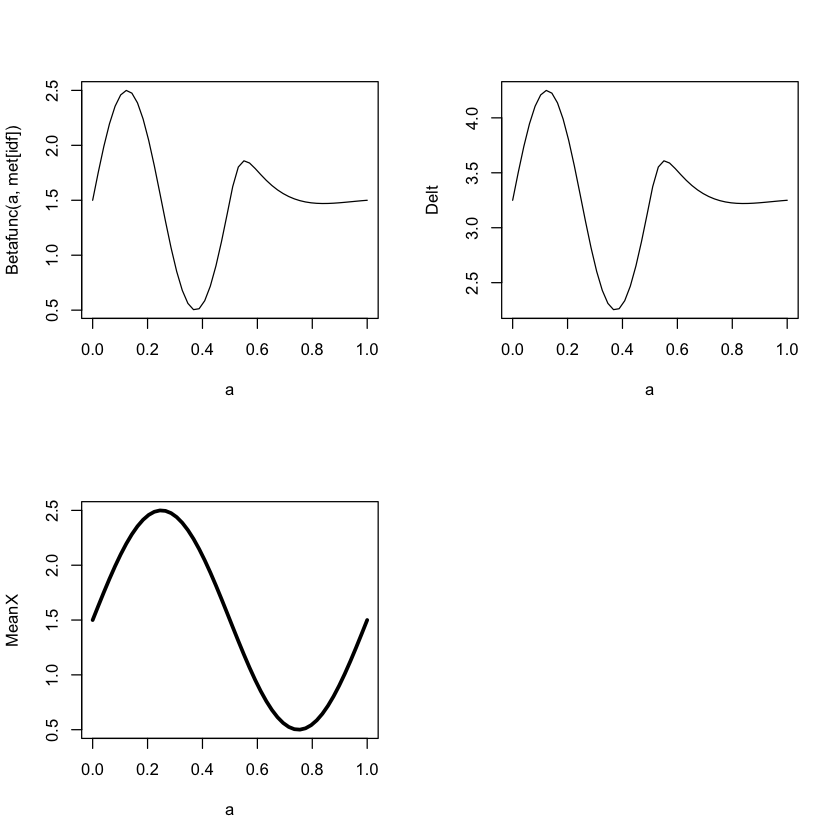

[1] -0.3919399


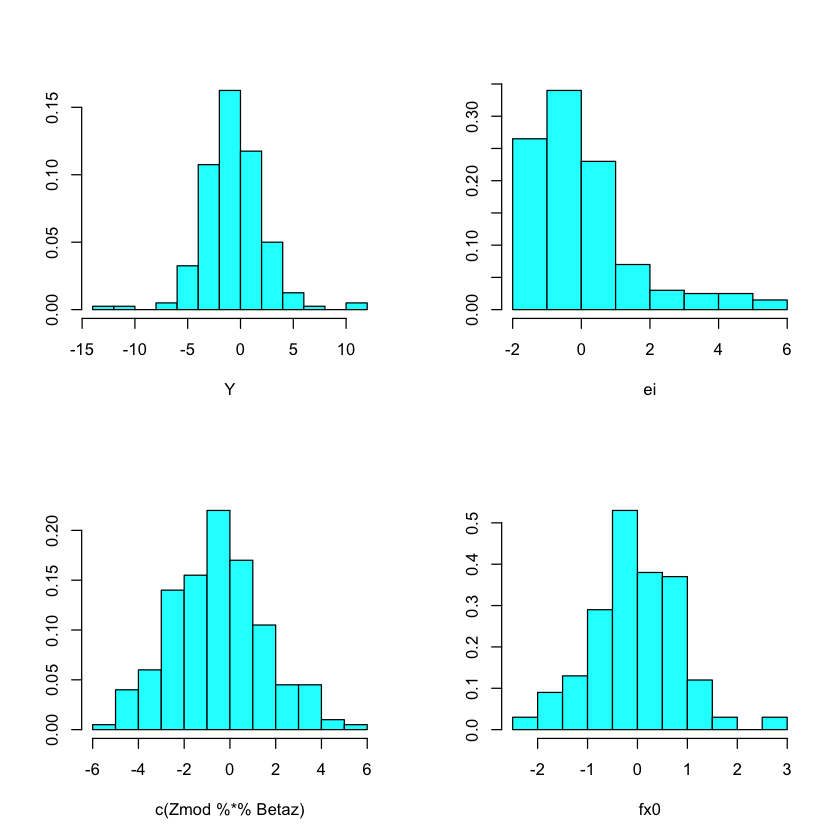

In [11]:

pn=20
print("Simulate data")
#nrep = 5; 
Wdist = "norm"
print("Simulate data")

SeedVal <- runif(n=1, min=1000, max=100000)

set.seed(20004)

distFep=c("Rst", "Norm","MixNorm","Gam")[4]

j0 = 3
pi.g <- .65
Prob0 <- rbinom(n=n,size=1,prob = pi.g)
Z <- matrix(rnorm(n=n*(j0-1), sd = 1), ncol = c(j0-1)); Z <- scale(Z); 
Z <- cbind(Z, rbinom(n = n, prob=pi.g, size=1))
DataSim <- DataSimReplicate(pn, n, t, a, j0=3, rhox, sig.x, rho.u, sig.u, rho.m, sig.w, distFep, distFUe, distFepWe, CovMet=c("CS", "Ar1")[2], sig.e, idf=c(1:4)[3], nrep, Wdist, Z)


## Quantile regression

Gal distro in Stan

In [12]:
functions <- "/*
A = -est*p_neg + .5*pow(gam, 2)*pow(p_neg/p_pos, 2) + log(Phi_approx(a2-a3)) + log1m_exp(fabs(log(Phi_approx(a2-a3)) - log(Phi_approx(a2)))); 
gam = (gamU - gamL) * ligam + gamL;
real gam = (gamU - gamL) * ligam + gamL;
real GAL2_lpdf(real y, real mu, real sigma, real ligam, real tau, real gamL, real gamU){
real GAL2_rng(real mu, real sigma, real ligam, real tau, real gamL, real gamU){
    */
    /* helper function for asym_laplace_lpdf
* Args:
    *   y: the response value
*   tau: quantile parameter in (0, 1)
*/
    real rho_quantile(real y, real tau) {
    if (y < 0) {
        return y * (tau - 1);
    } else {
        return y * tau;
    }
    }
/* asymmetric laplace log-PDF for a single response
* Args:
    *   y: the response value
*   mu: location parameter
*   sigma: positive scale parameter
*   tau: quantile parameter in (0, 1)
* Returns:
    *   a scalar to be added to the log posterior
*/
    real asym_laplace_lpdf(real y, real mu, real sigma, real tau) {
    return log(tau * (1 - tau)) -
        log(sigma) -
        rho_quantile((y - mu) / sigma, tau);
    }
/* asymmetric laplace log-CDF for a single quantile
* Args:
    *   y: a quantile
*   mu: location parameter
*   sigma: positive scale parameter
*   tau: quantile parameter in (0, 1)
* Returns:
    *   a scalar to be added to the log posterior
*/
    real asym_laplace_lcdf(real y, real mu, real sigma, real tau) {
    if (y < mu) {
        return log(tau) + (1 - tau) * (y - mu) / sigma;
    } else {
        return log1m((1 - tau) * exp(-tau * (y - mu) / sigma));
    }
    }
/* asymmetric laplace log-CCDF for a single quantile
* Args:
    *   y: a quantile
*   mu: location parameter
*   sigma: positive scale parameter
*   tau: quantile parameter in (0, 1)
* Returns:
    *   a scalar to be added to the log posterior
*/
    real asym_laplace_lccdf(real y, real mu, real sigma, real tau) {
    if (y < mu) {
        return log1m(tau * exp((1 - tau) * (y - mu) / sigma));
    } else {
        return log1m(tau) - tau * (y - mu) / sigma;
    }
    }
    
    real GAL2_lpdf(real y, real mu, real sigma, real gam, real tau){
    
    real p_pos;
    real p_neg;
    real a3;
    real a2;
    real p;
    real est;
    real A;
    real B;
    real Res = 0;
    //real gam = ligam;
    p = 1 * (gam < 0) + (tau - 1 * (gam < 0))/(2*Phi(-fabs(gam))*exp(.5*pow(gam, 2)));
    p_pos = p -  1 * (gam > 0);
    p_neg = p -  1 * (gam < 0);  
    est = (y - mu) / sigma; 
    
    if(fabs(gam) > 0){
    a3 = p_pos * (est / fabs(gam));
    a2 = fabs(gam) * (p_neg / p_pos);
    
    
    if(est/gam > 0){
    A =  0.5*pow(gam, 2)*pow(p_neg/p_pos, 2) - est*p_neg + log_diff_exp(log(Phi_approx(a2-a3)), log(Phi_approx(a2)) ); 
    B =  0.5*pow(gam, 2) - p_pos*est + log(Phi_approx(-fabs(gam) + a3));
    Res = log(2*p*(1-p)) - log(sigma) +  log_sum_exp(A, B);
    }else{
    Res =  log(2*p*(1-p)) - log(sigma) - p_pos * est + 0.5 * pow(gam, 2) + log(Phi_approx(-fabs(gam) ));
    }
    }else{
    Res = asym_laplace_lpdf( y | mu, sigma, tau); 
    }
    
    return Res;
    }

real GAL2_rng(real mu, real sigma, real gam, real tau){

    real A;
    real B;
    real C;
    real p;
    real hi;
    real nui;
    real mui=0;
    real Up = uniform_rng(.5, 1.0);
    
    // real gam = ligam;
    p = (gam < 0) + (tau - (gam < 0))/(2*Phi_approx(-fabs(gam))*exp(.5*pow(gam, 2)));
    A = (1 - 2*p)/(p - pow(p,2));
    B = 2/(p - pow(p,2));
    C = 1/((gam > 0) - p);
    
    hi = sigma * inv_Phi(Up);
    nui = sigma * exponential_rng(1);
    mui += mu + A * nui + C * fabs(gam) * hi;

    return normal_rng(mui, sqrt(sigma*B*nui));
}"

In [13]:
library(rstan)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders


rstan version 2.26.21 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


